# HOUSE PRICE PREDICTION

 `Project Description`


Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

Practice Skills
Creative feature engineering

Acknowledgments
The Ames Housing dataset was compiled by Dean De Cock for use in data science education. It's an incredible alternative for datascientists looking for a modernized and expanded version of the often cited Boston Housing dataset.

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector

import statistics as stats
from scipy import stats

In [133]:
data = pd.read_csv(r"Price datasets.csv")
df =data.copy()
df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [134]:
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [135]:
df =data.copy()
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [136]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [137]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [138]:
print(df.iloc[:,40:].isnull().sum())

HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBath        0
BsmtHalfBath        0
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
PoolQC           1453
Fence            1179
MiscFeature      1406
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
SalePrice           0
dtype: int64


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Data Cleaning

C:\Users\mohit\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


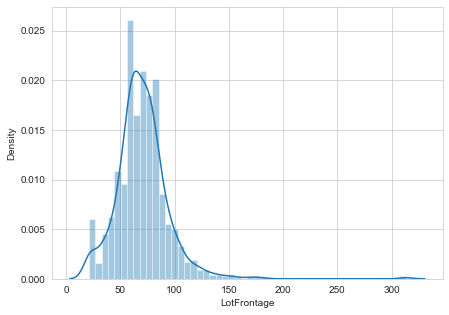

In [140]:
plt.figure(figsize=(7,5))
sns.distplot(df['LotFrontage'])
plt.show()

<AxesSubplot:ylabel='Alley'>

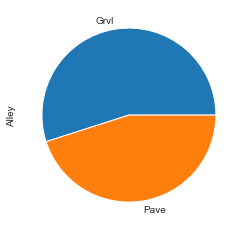

In [141]:
df['Alley'].value_counts().plot(kind = 'pie',)

In [142]:
df['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

<Figure size 1008x432 with 0 Axes>

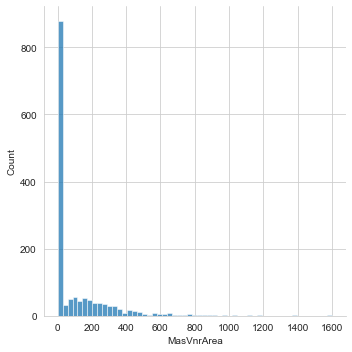

In [143]:
plt.figure(figsize=(14,6))
sns.displot(df['MasVnrArea'])
plt.show()

In [144]:
df['BsmtCond'].value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [145]:
df['BsmtFinType1'].value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [146]:
df['BsmtExposure'].value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [147]:
df['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [148]:
df['GarageFinish'].value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [149]:
df['GarageQual'].value_counts()

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

In [150]:
df['GarageCond'].value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [151]:
#Filling the nan values
df['LotFrontage'] = df['LotFrontage'].fillna(np.mean(df['LotFrontage']))

#filling the value BSMT cond, which have high count in data
df['BsmtCond'] = df['BsmtCond'].fillna('TA')
df['BsmtQual'] = df['BsmtQual'].fillna('TA')
df['ExterQual'] = df['ExterQual'].fillna('No')
df['BsmtExposure'] = df['BsmtExposure'].fillna('No')
df['BsmtFinType1'] = df['BsmtFinType1'].fillna('Unf')
df['BsmtFinType2'] = df['BsmtFinType2'].fillna('Unf')
df['GarageType'] = df['GarageType'].fillna('Attchd')
df['GarageFinish'] = df['GarageFinish'].fillna('Unf')
df['GarageQual'] = df['GarageQual'].fillna('TA')
df['GarageCond'] = df['GarageCond'].fillna('TA')

df['MasVnrType'] = df['MasVnrType'].fillna('None')
df['MasVnrArea'] = df['MasVnrArea'].fillna(np.mean(df['MasVnrArea']))

In [152]:
#Dropping the columns having high nan values and also unwanted columns
df.drop(columns=['Alley','FireplaceQu','MiscFeature','PoolQC','Fence','MiscVal','Id'], axis=1,inplace=True)

In [153]:
#Dropping
df.dropna(inplace=True)

In [154]:
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 74, dtype: int64

In [155]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,61,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,42,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,35,272,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,84,0,0,0,0,12,2008,WD,Normal,250000


### REMOVING THE UNWANTED COLUMNS WHICH IS NOT GOOD PRICE PREDICITON

In [156]:
len(df.columns)

74

In [157]:
df.corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.357831,-0.136070,0.050487,-0.096822,0.059599,0.036498,0.034005,-0.067516,-0.079214,...,-0.066270,-0.009205,-0.001355,-0.022003,-0.043913,-0.021617,0.010328,-0.016594,-0.023136,-0.077622
LotFrontage,-0.357831,1.000000,0.301378,0.226549,-0.042045,0.104317,0.080931,0.175921,0.220674,0.041894,...,0.332633,0.071679,0.147018,0.013043,0.061618,0.032468,0.185247,0.017707,0.010749,0.329340
LotArea,-0.136070,0.301378,1.000000,0.089982,-0.002906,-0.005847,0.002837,0.096076,0.210153,0.109995,...,0.167603,0.166602,0.085023,-0.013451,0.018435,0.038587,0.076863,-0.000591,-0.013788,0.252911
OverallQual,0.050487,0.226549,0.089982,1.000000,-0.136627,0.573228,0.558831,0.401105,0.223198,-0.073376,...,0.527965,0.227349,0.318732,-0.106867,0.024244,0.050418,0.064278,0.065045,-0.019188,0.787319
OverallCond,-0.096822,-0.042045,-0.002906,-0.136627,1.000000,-0.403392,0.048774,-0.135038,-0.051226,0.038662,...,-0.196931,-0.005631,-0.053387,0.063070,0.026691,0.057407,-0.002301,-0.010758,0.050369,-0.095378
YearBuilt,0.059599,0.104317,-0.005847,0.573228,-0.403392,1.000000,0.617730,0.302293,0.230641,-0.066451,...,0.445646,0.213184,0.221511,-0.378536,0.026395,-0.069237,0.001225,0.009029,-0.006928,0.508013
YearRemodAdd,0.036498,0.080931,0.002837,0.558831,0.048774,0.617730,1.000000,0.174315,0.115515,-0.077629,...,0.382934,0.204375,0.236459,-0.210659,0.043847,-0.047909,0.004144,0.017478,0.039845,0.505822
MasVnrArea,0.034005,0.175921,0.096076,0.401105,-0.135038,0.302293,0.174315,1.000000,0.255790,-0.078239,...,0.368120,0.150584,0.128998,-0.104847,0.015498,0.054074,0.009780,-0.010449,-0.004661,0.465688
BsmtFinSF1,-0.067516,0.220674,0.210153,0.223198,-0.051226,0.230641,0.115515,0.255790,1.000000,-0.055198,...,0.288871,0.194813,0.119882,-0.097032,0.023826,0.056037,0.141615,-0.017879,0.017862,0.375540
BsmtFinSF2,-0.079214,0.041894,0.109995,-0.073376,0.038662,-0.066451,-0.077629,-0.078239,-0.055198,1.000000,...,-0.047442,0.063263,0.004713,0.045316,-0.031469,0.087278,0.041456,-0.019147,0.032750,-0.023292


In [158]:
#Dropping those values which giving negative correlation
df2 = df.drop(columns=['OverallCond','MSSubClass','BsmtFinSF2','LowQualFinSF','BsmtHalfBath',
                       'KitchenAbvGr','EnclosedPorch','YrSold'],axis=1)
df2.head()

,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,PavedDrive,WoodDeckSF,OpenPorchSF,3SsnPorch,ScreenPorch,PoolArea,MoSold,SaleType,SaleCondition,SalePrice
0,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,Y,0,61,0,0,0,2,WD,Normal,208500
1,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,Y,298,0,0,0,0,5,WD,Normal,181500
2,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,Y,0,42,0,0,0,9,WD,Normal,223500
3,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,Y,0,35,0,0,0,2,WD,Abnorml,140000
4,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,Y,192,84,0,0,0,12,WD,Normal,250000


### Removing those columns which are in negative impact over the price

In [159]:
df.drop(columns=['MSSubClass','OverallCond','YrSold','BsmtFinSF2','LowQualFinSF','BsmtHalfBath','KitchenAbvGr',
                'EnclosedPorch','MoSold','ScreenPorch'], axis=1,inplace=True)
len(df.columns)

64

### Removing those columns which are giving 30% in house price

In [160]:
df.drop(columns=['3SsnPorch','PoolArea','BedroomAbvGr'],axis=1,inplace=True)
df.columns

Index(['MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'SaleType', 'SaleCondition',
       'SalePrice'],
      dtype='object')

In [161]:
df2.shape

(1378, 66)

# NUMERICAL COLUMNS EDA

In [162]:
print(df2.select_dtypes(include=[float]).columns)
df2['LotFrontage'] = df2['LotFrontage'].astype(int)
df2['MasVnrArea'] = df2['MasVnrArea'].astype(int)
df2['GarageYrBlt'] = df2['GarageYrBlt'].astype(int)

Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')


In [163]:
print(df2.select_dtypes(include=[float]).columns)
#Now No float columns in the  data

Index([], dtype='object')


In [164]:
def Numerical(x,fig):
    plt.subplot(5,2,fig)
    plt.title(x+' Histogram')
    sns.distplot(df2[x])
    plt.subplot(5,2,(fig+1))
    plt.title(x+' ScatterPLot')
    sns.scatterplot(x= df2[x],y=df2.SalePrice)
    
plt.figure(figsize=(25,30))
plt.tight_layout()
plt.show()

<Figure size 1800x2160 with 0 Axes>

In [165]:
df_num = df2.select_dtypes(include=[int])
df_num.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MoSold', 'SalePrice'],
      dtype='object')

C:\Users\mohit\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mohit\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mohit\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use eith

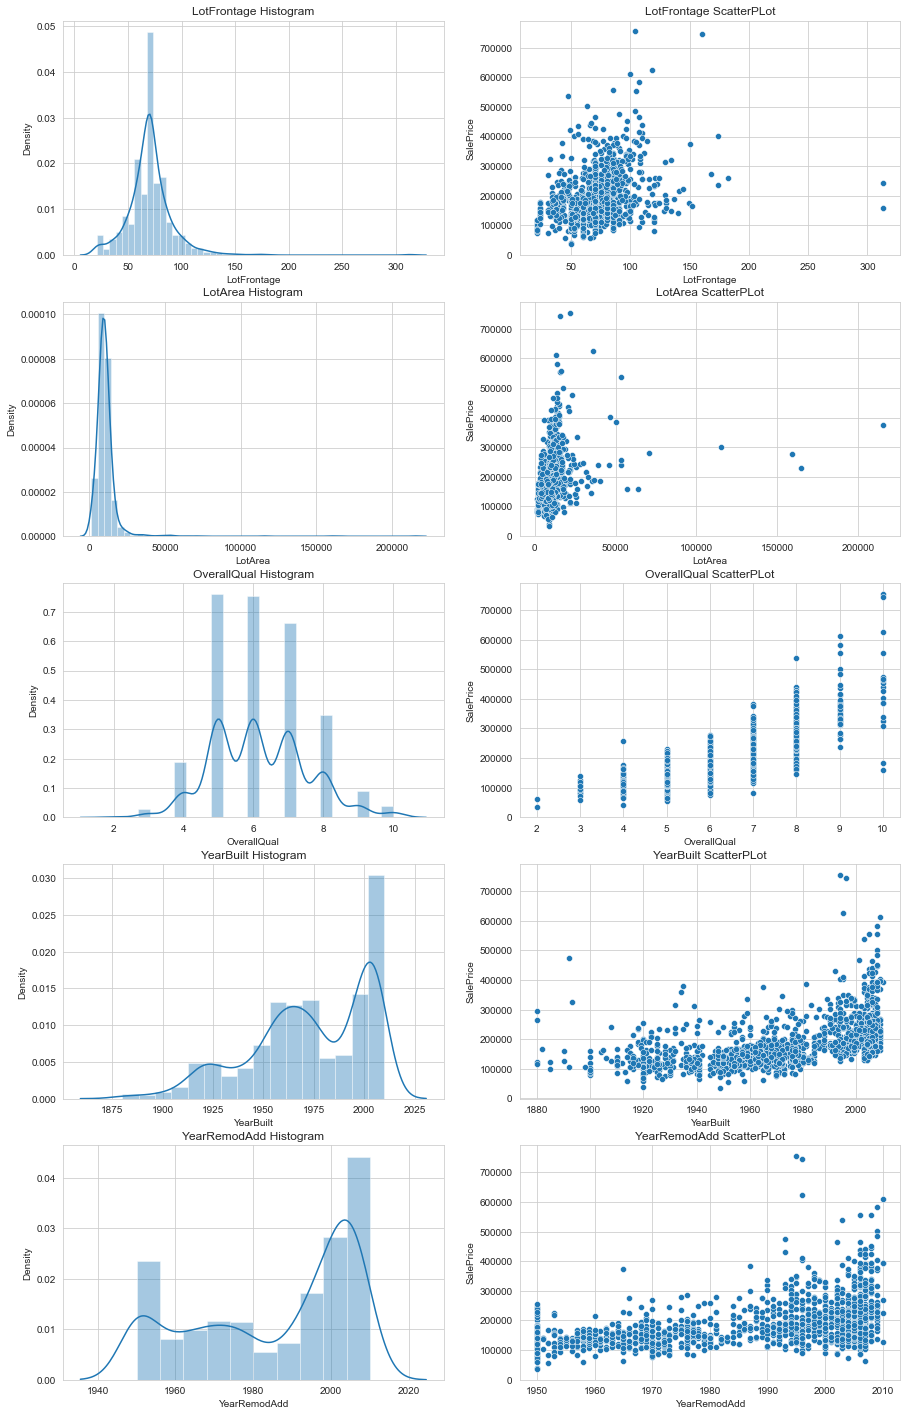

In [166]:
plt.figure(figsize=(15,25))
Numerical('LotFrontage',1)
Numerical('LotArea',3)
Numerical('OverallQual',5)
Numerical('YearBuilt',7)
Numerical('YearRemodAdd',9)
plt.show()

C:\Users\mohit\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mohit\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mohit\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use eith

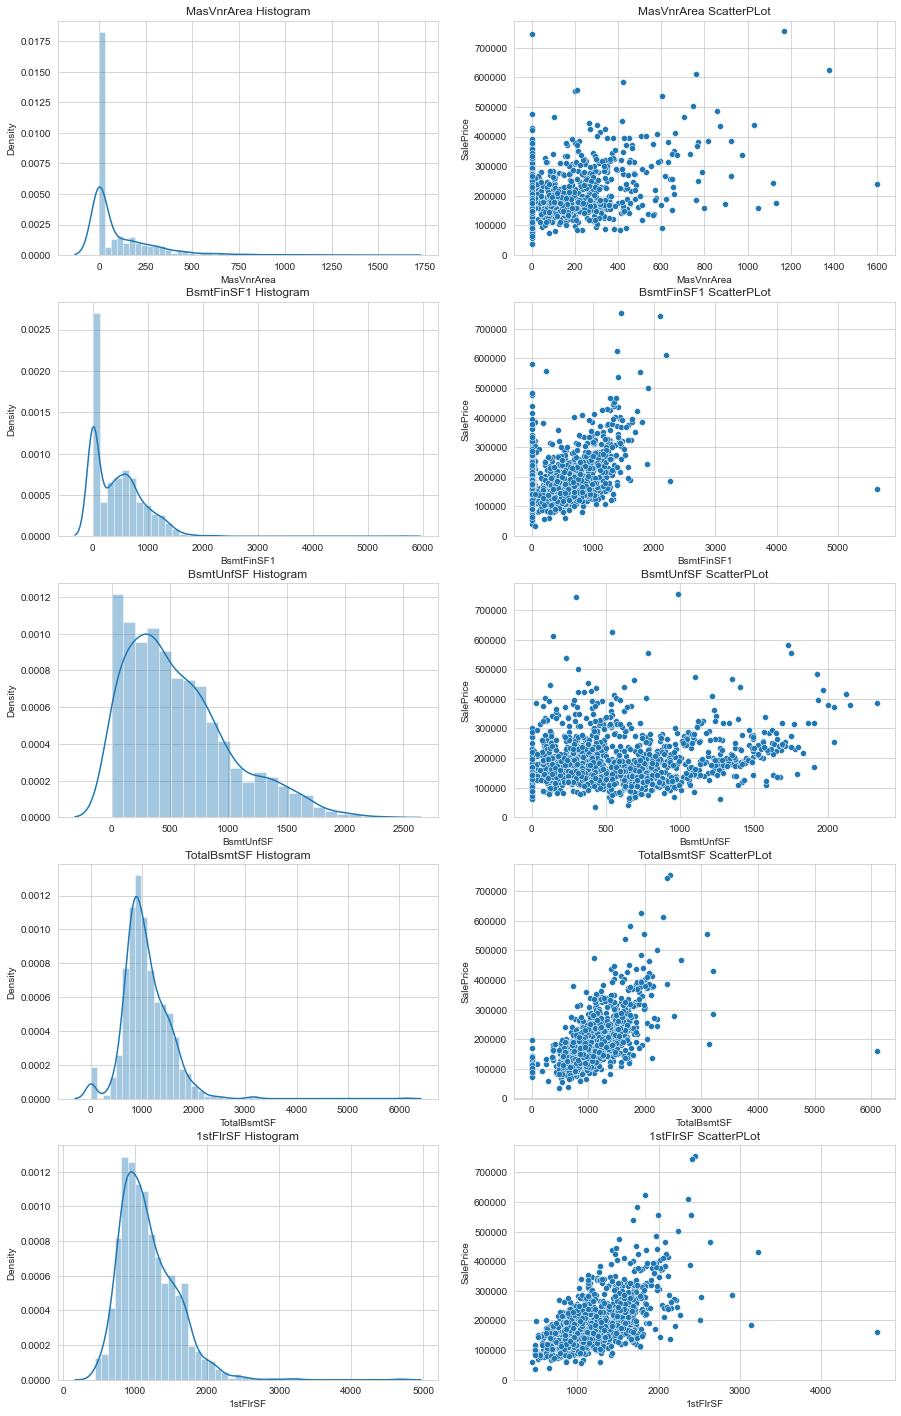

In [167]:
plt.figure(figsize=(15,25))
Numerical('MasVnrArea',1)
Numerical('BsmtFinSF1',3)
Numerical('BsmtUnfSF',5)
Numerical('TotalBsmtSF',7)
Numerical('1stFlrSF',9)

C:\Users\mohit\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mohit\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mohit\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use eith

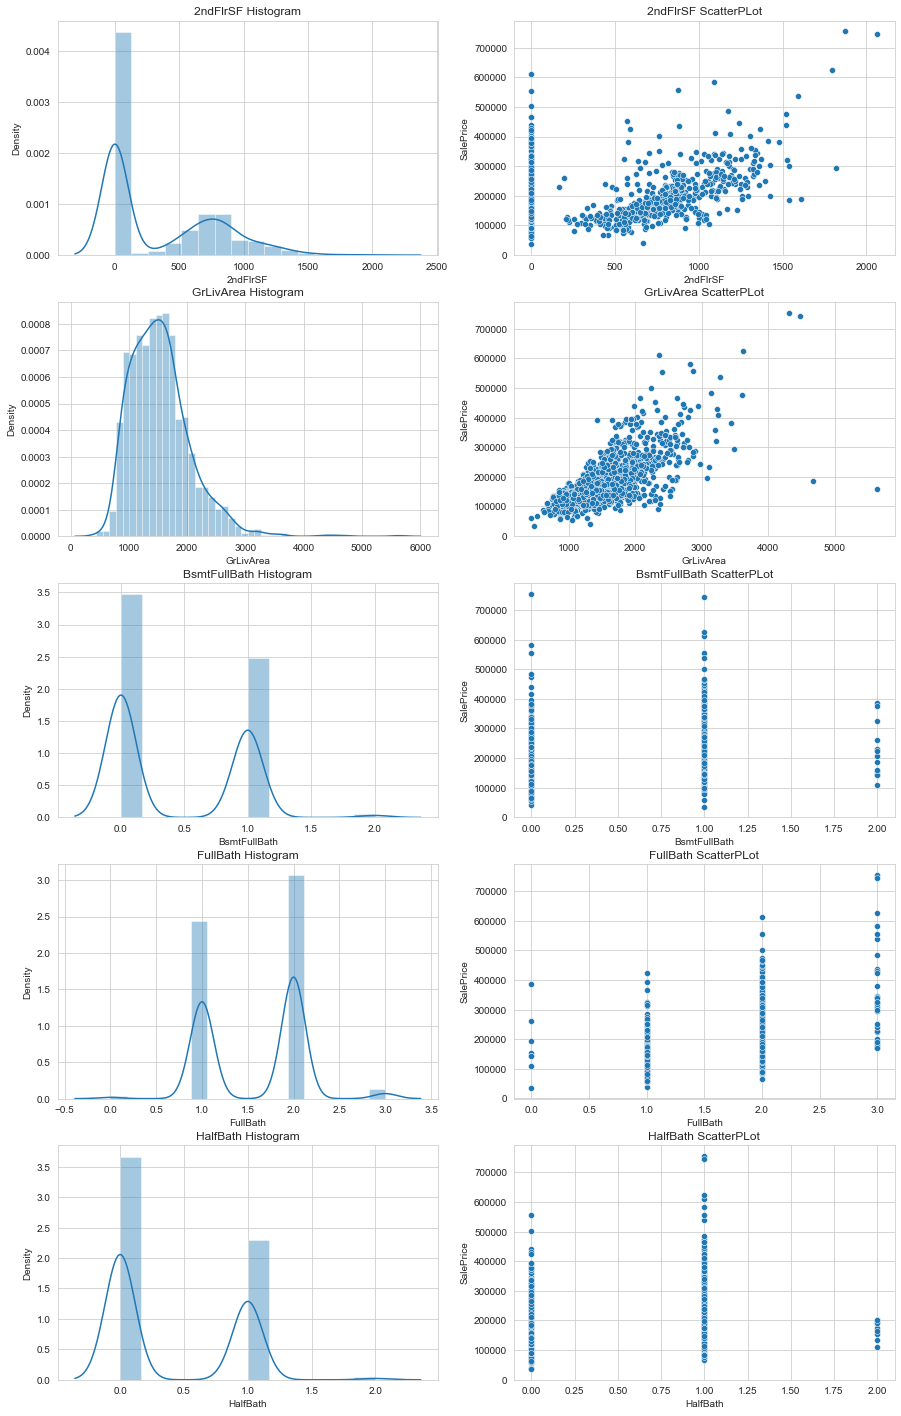

In [168]:
plt.figure(figsize=(15,25))
Numerical('2ndFlrSF',1)
Numerical('GrLivArea',3)
Numerical('BsmtFullBath',5)
Numerical('FullBath',7)
Numerical('HalfBath',9)

C:\Users\mohit\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mohit\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mohit\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use eith

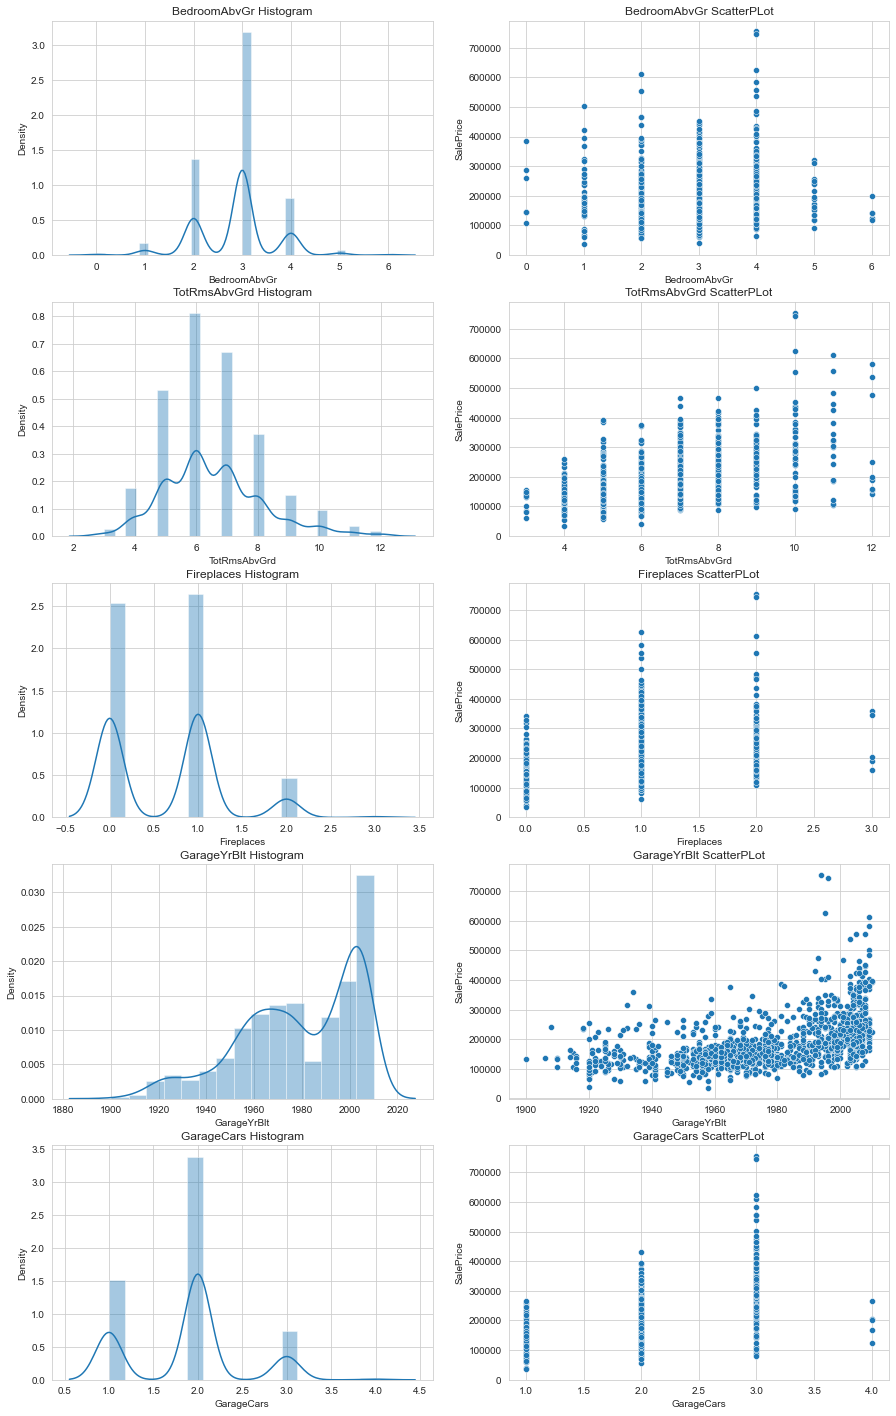

In [169]:
plt.figure(figsize=(15,25))
Numerical('BedroomAbvGr',1)
Numerical('TotRmsAbvGrd',3)
Numerical('Fireplaces',5)
Numerical('GarageYrBlt',7)
Numerical('GarageCars',9)

In [170]:
df2.columns

Index(['MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MoSold', 'SaleType', 'SaleCondition',
       'SalePrice

C:\Users\mohit\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mohit\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mohit\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use eith

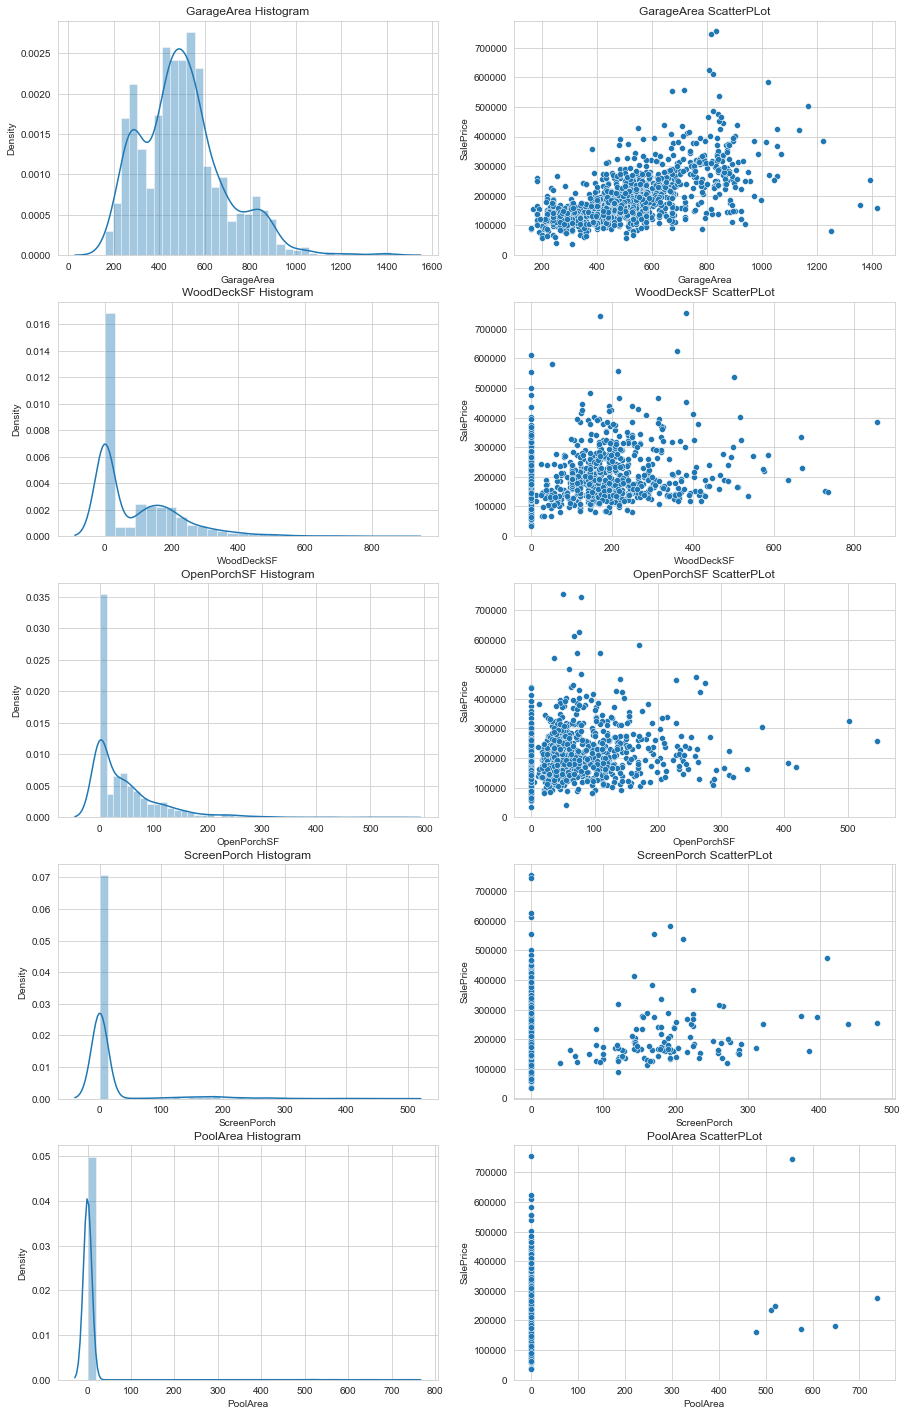

In [171]:
plt.figure(figsize=(15,25))
Numerical('GarageArea',1)
Numerical('WoodDeckSF',3)
Numerical('OpenPorchSF',5)
Numerical('ScreenPorch',7)
Numerical('PoolArea',9)

C:\Users\mohit\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


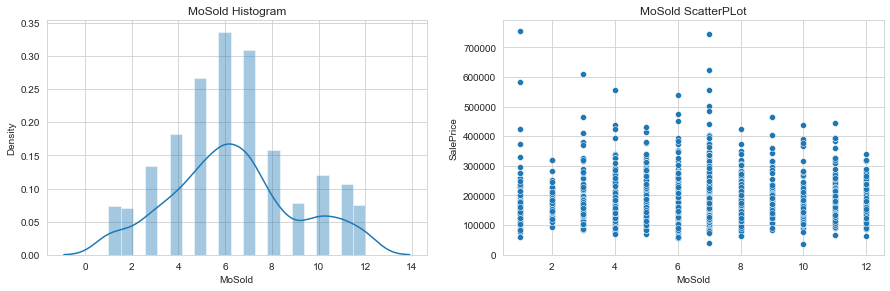

In [172]:
plt.figure(figsize=(15,25))
Numerical('MoSold',3)

In [173]:
df_num.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MoSold', 'SalePrice'],
      dtype='object')

In [174]:
len(df_num.columns)

28

# ALL CATEGORICAL COLUMNS EDA

In [175]:
def categorical(x,fig):
    plt.subplot(5,2,fig)
    plt.title(x+' Graph')
    sns.countplot(df2[x],palette=('magma'))
    
    plt.subplot(5,2,(fig+1))
    plt.title(x+' Graph')
    sns.boxplot(x=df2[x], y=data.SalePrice,palette=('magma'))
    

plt.figure(figsize=(15,23))
plt.tight_layout()

<Figure size 1080x1656 with 0 Axes>

C:\Users\mohit\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mohit\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mohit\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will

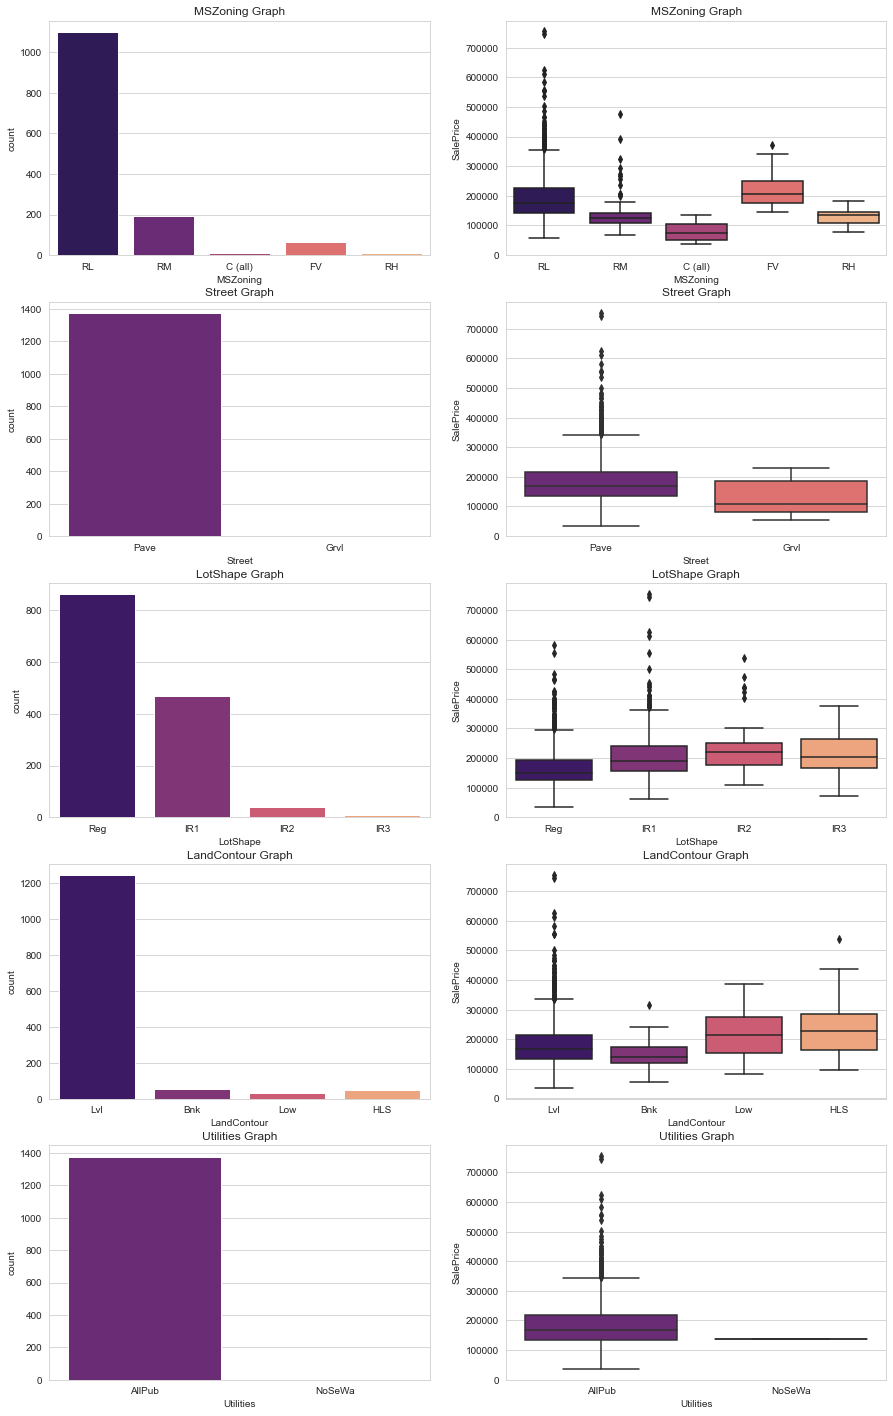

In [176]:
plt.figure(figsize=(15,25))
categorical('MSZoning',1)
categorical('Street',3) 
categorical('LotShape',5)
categorical('LandContour',7)
categorical('Utilities',9)

C:\Users\mohit\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mohit\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mohit\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will

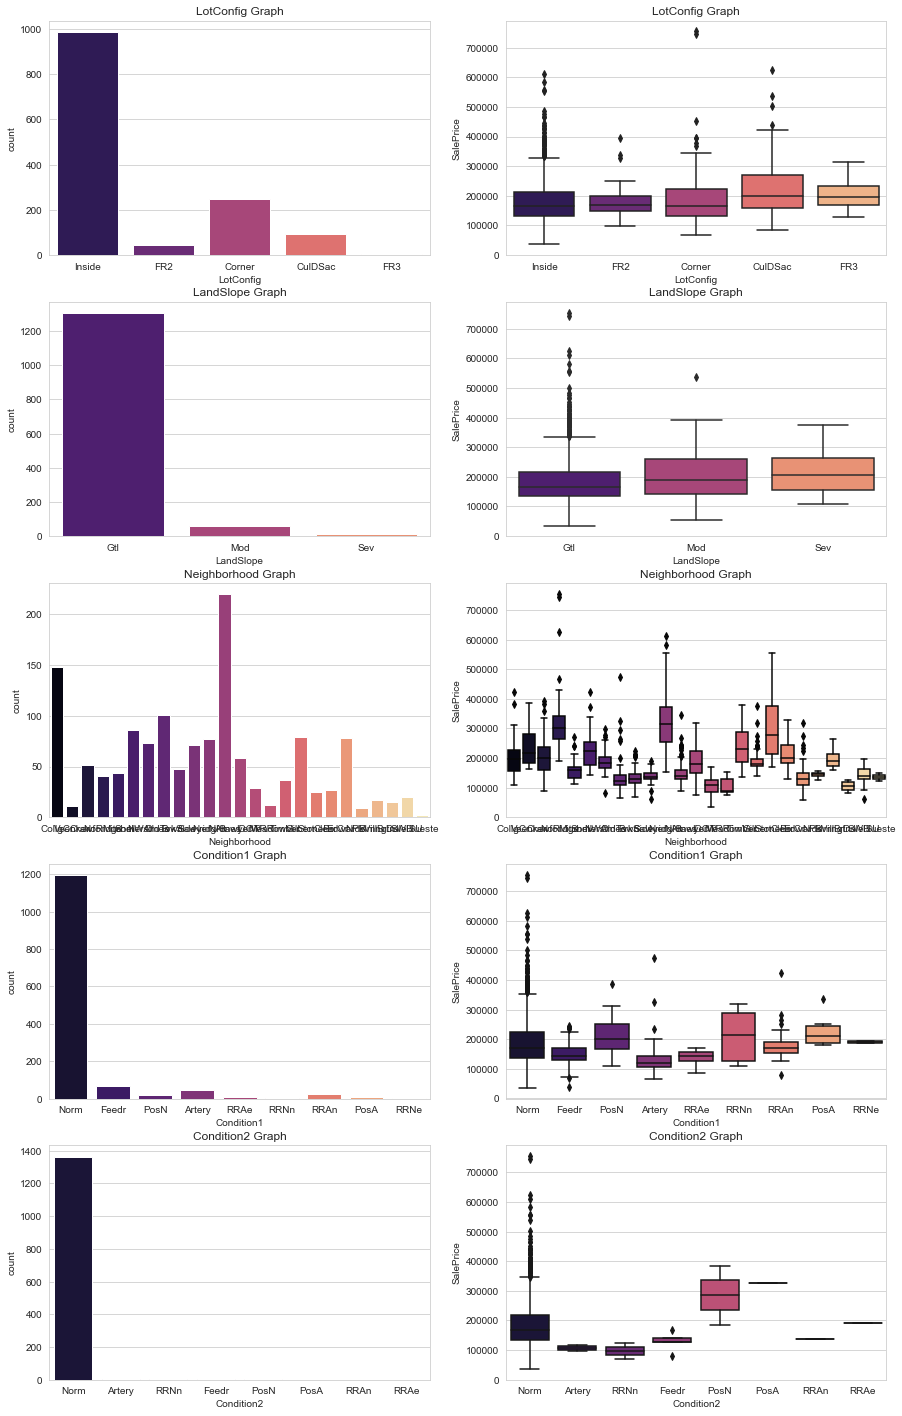

In [177]:
plt.figure(figsize=(15,25))
categorical('LotConfig',1)
categorical('LandSlope',3)
categorical('Neighborhood',5)
categorical('Condition1',7)
categorical('Condition2',9)

C:\Users\mohit\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mohit\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mohit\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will

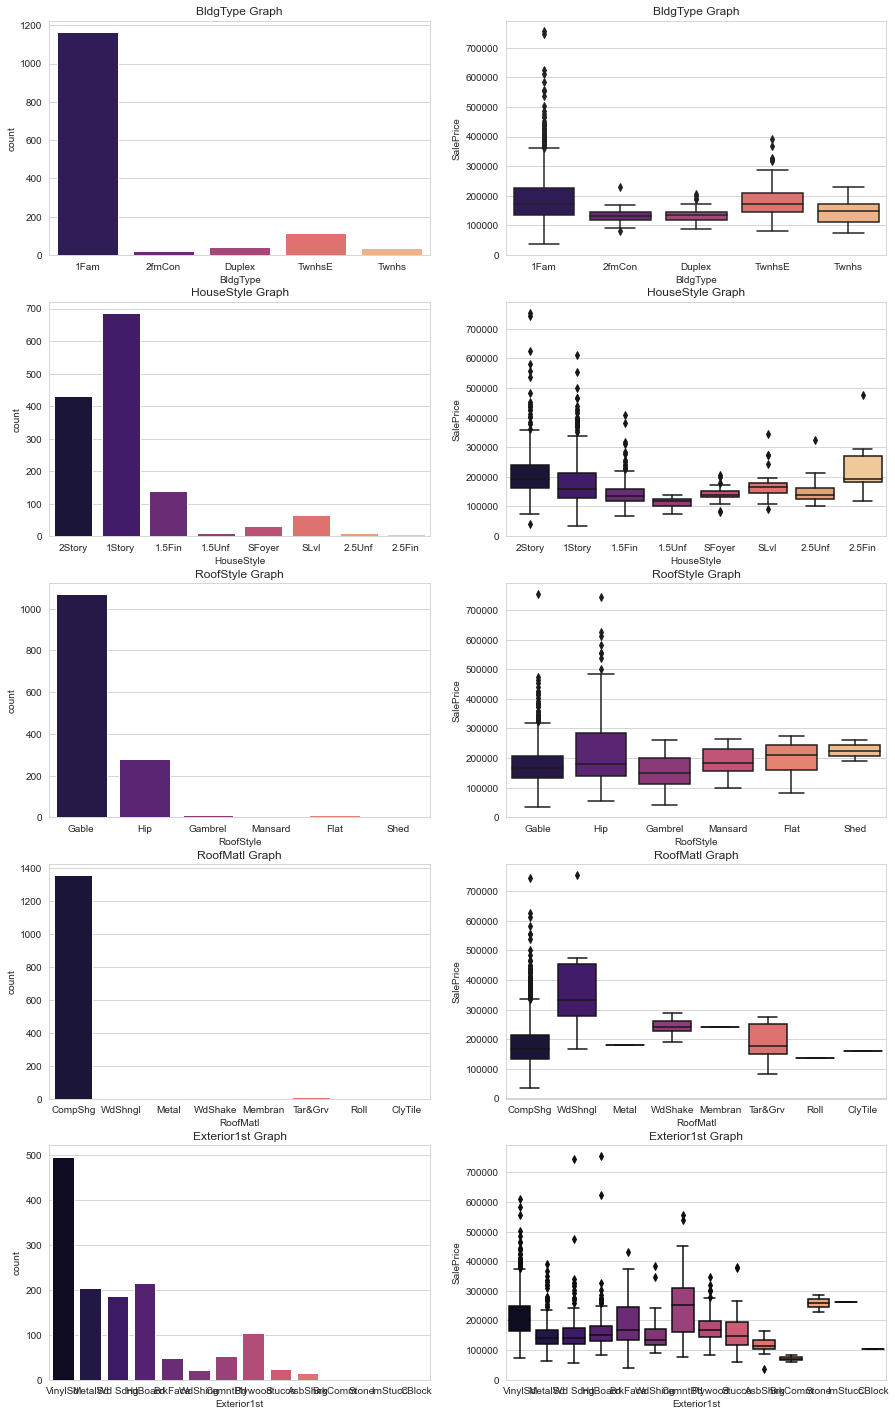

In [178]:
plt.figure(figsize=(15,25))
categorical('BldgType',1)
categorical('HouseStyle',3)
categorical('RoofStyle',5)
categorical('RoofMatl',7)
categorical('Exterior1st',9)

C:\Users\mohit\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mohit\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mohit\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will

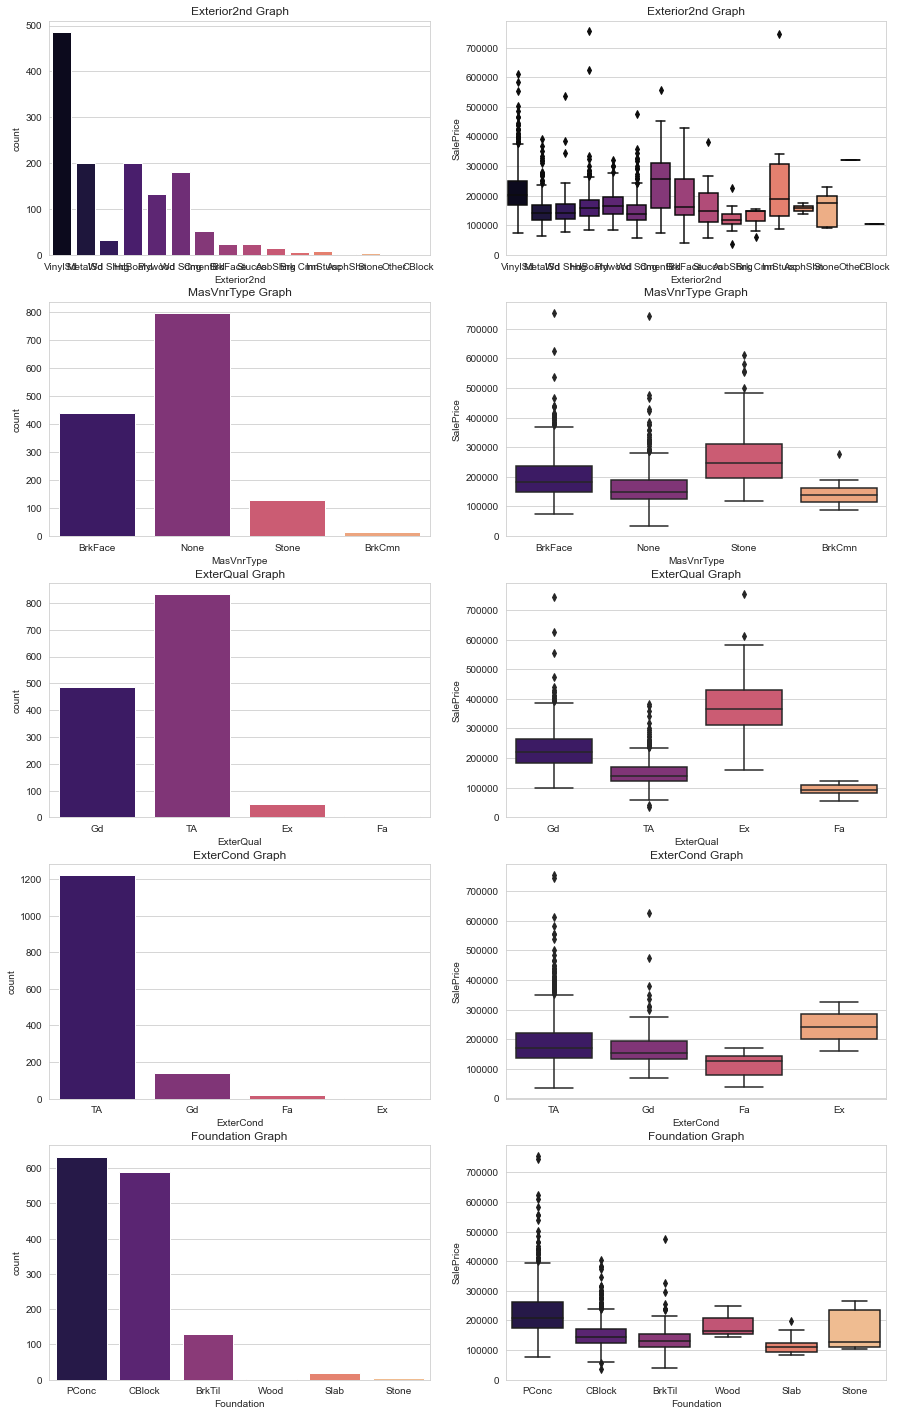

In [179]:
plt.figure(figsize=(15,25))
categorical('Exterior2nd',1)
categorical('MasVnrType',3)
categorical('ExterQual',5)
categorical('ExterCond',7)
categorical('Foundation',9)

C:\Users\mohit\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mohit\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mohit\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will

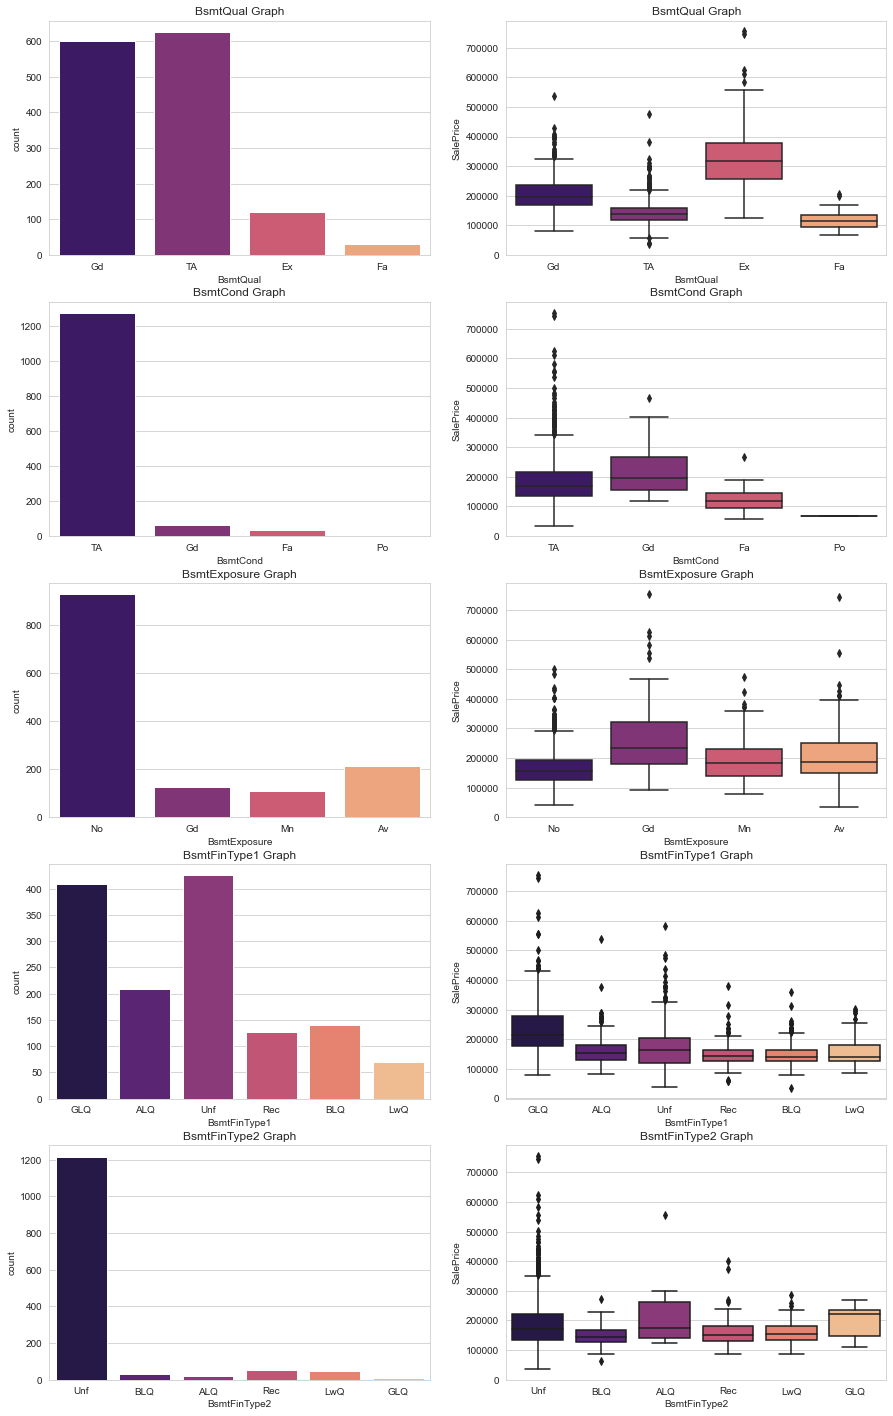

In [180]:
plt.figure(figsize=(15,25))
categorical('BsmtQual',1)
categorical('BsmtCond',3)
categorical('BsmtExposure',5)
categorical('BsmtFinType1',7)
categorical('BsmtFinType2',9)

In [181]:
#ALL CATEGORICAL COLUMNS
df_cat = df.select_dtypes(include=[object])
df_cat.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

C:\Users\mohit\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mohit\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mohit\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will

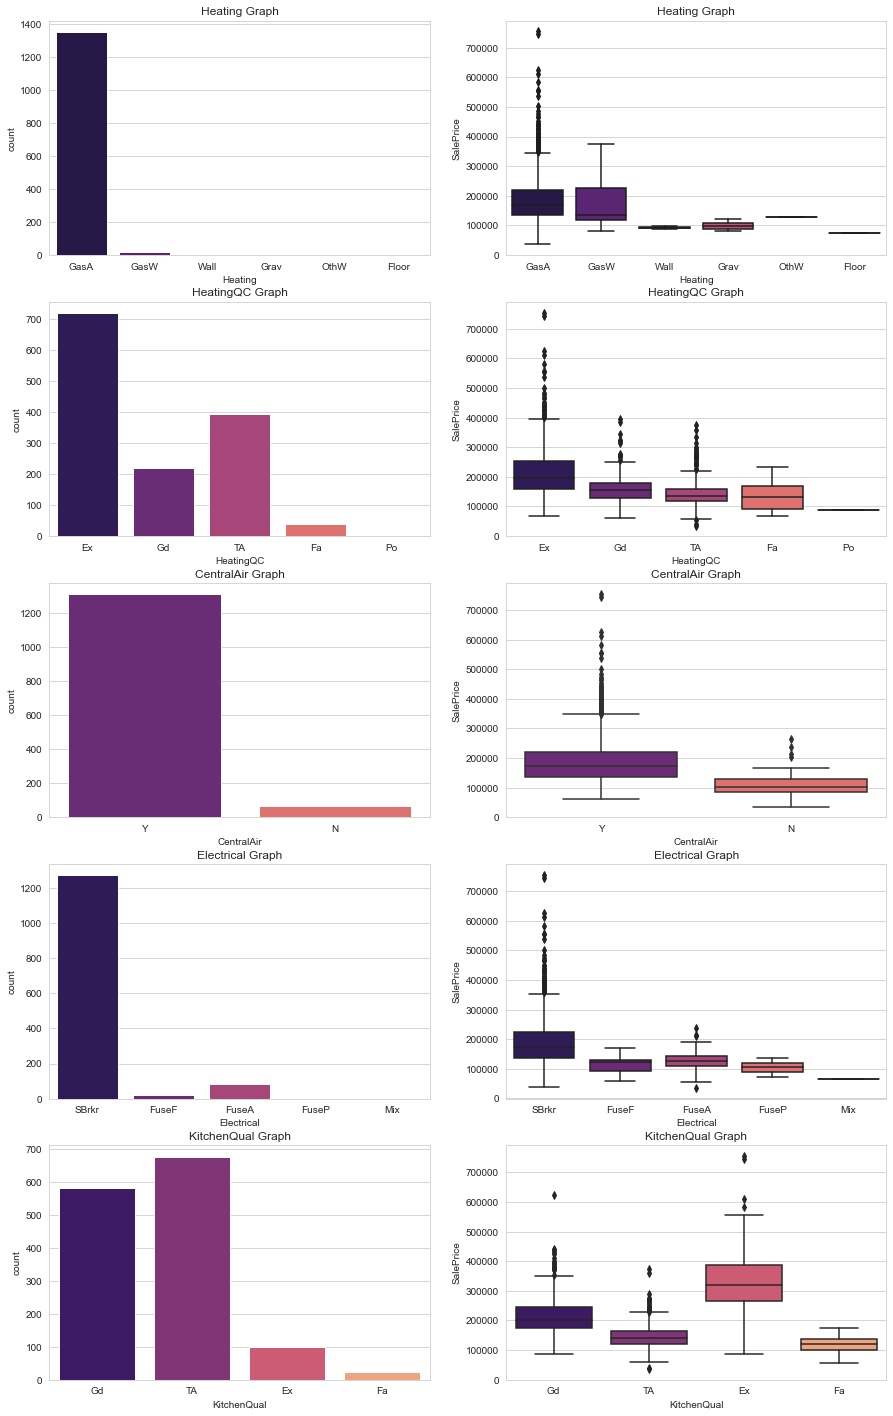

In [182]:
plt.figure(figsize=(15,25))
categorical('Heating',1)
categorical('HeatingQC',3)
categorical('CentralAir',5)
categorical('Electrical',7)
categorical('KitchenQual',9)

C:\Users\mohit\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mohit\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mohit\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will

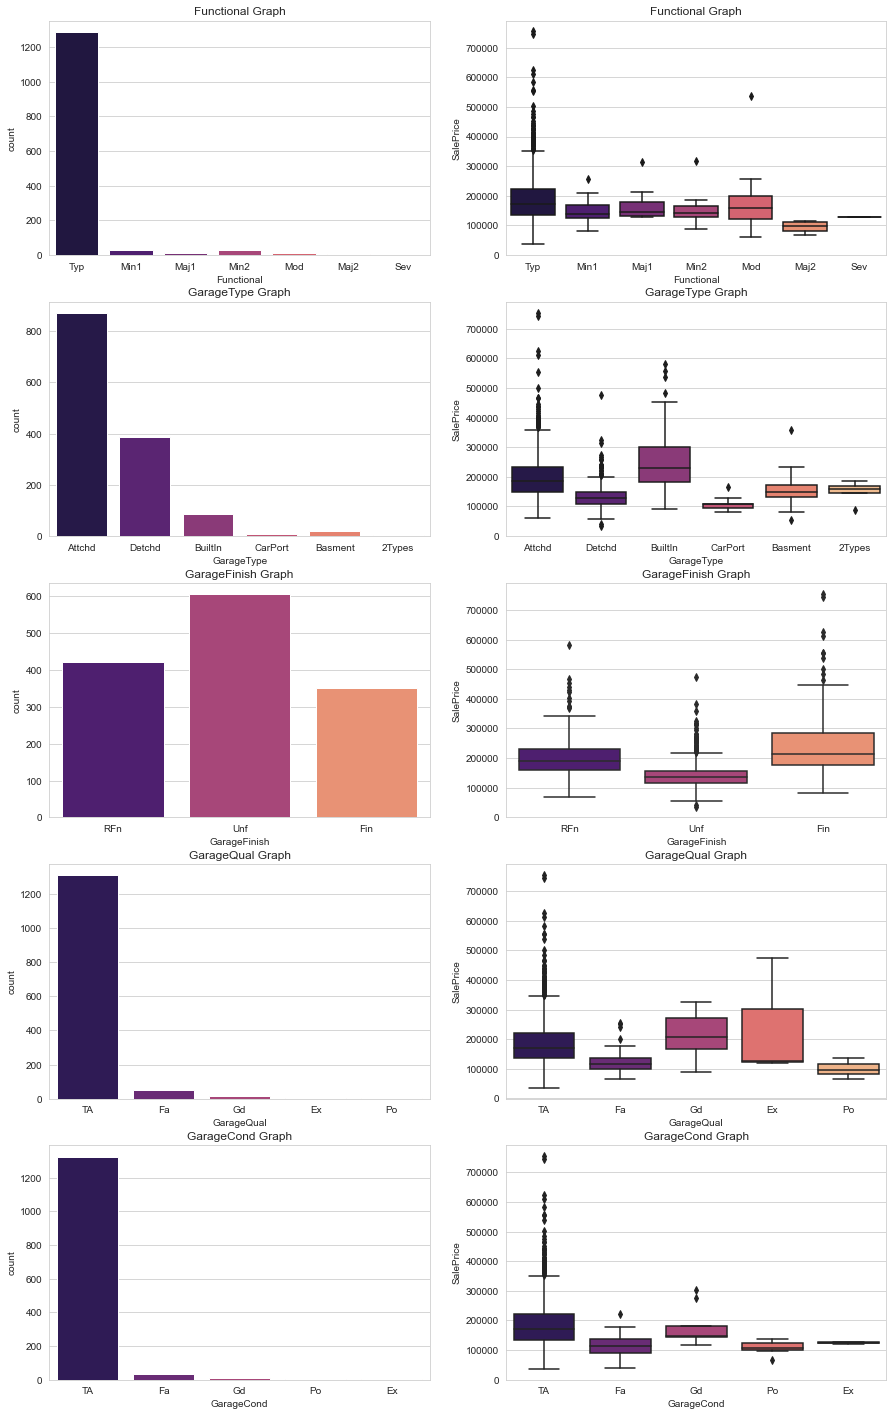

In [183]:
plt.figure(figsize=(15,25))
categorical('Functional',1)
categorical('GarageType',3)
categorical('GarageFinish',5)
categorical('GarageQual',7)
categorical('GarageCond',9)

C:\Users\mohit\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mohit\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mohit\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will

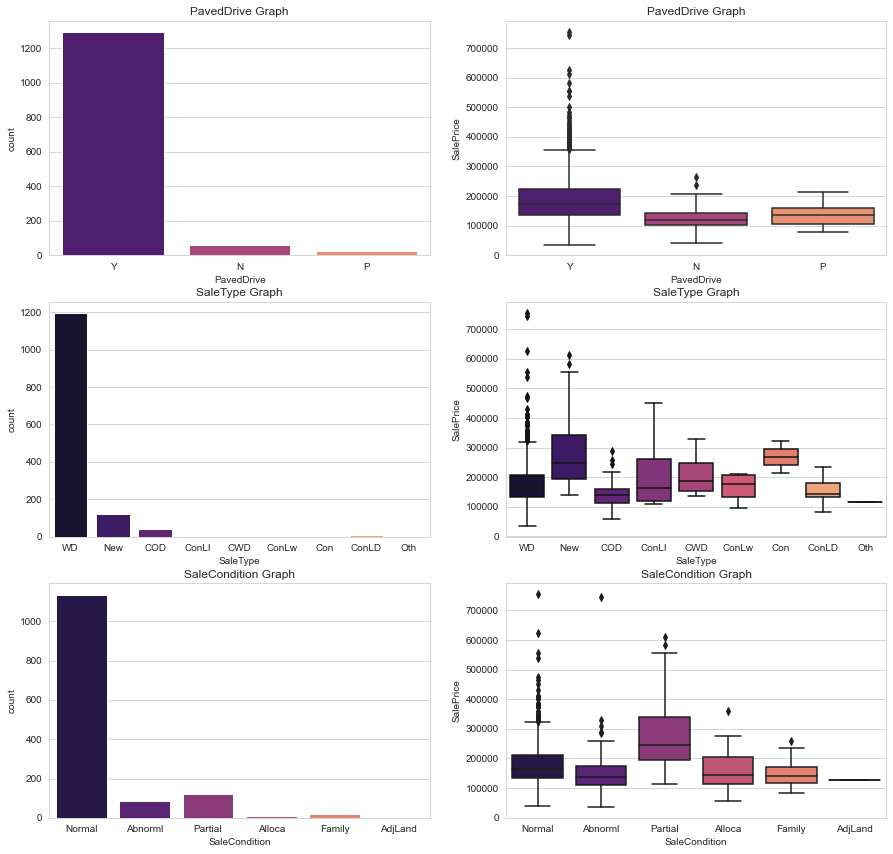

In [184]:
plt.figure(figsize=(15,25))
categorical('PavedDrive',1)
categorical('SaleType',3)
categorical('SaleCondition',5)

### NUMERICAL

Columns which is not contributing in saleprice. 

    1.BsmtFinSF1,
    2.TotRmsAbvGrd
    3.HalfBath
    4.Fireplaces.
    5.MasVnrArea
    6.BsmtFullBath
    7.GarageCars
    8.GarageArea 

### CATEGORICAL COLUMNS ANALYSIS

    1.Good
    2.MSZoning
    3.LotShape
    4.Alley
    5.LotConfig
    6.BsmtQual
    7.ExterQual
    8.BsmtExposure
    9.BsmtFinType1
    10.HeatingQC
    11.KitchenQual
    12.FireplaceQu
    13.GarageType
    14.GarageFinish
    15.PoolQC

BAD COLUMNS NOT CONTRIBUITNG IN ANALYSIS

    1.Utilities
    2.Street
    3.Condition1
    4.Condition2
    5.Neighborhood
    6.RoofMatl
    7.ExterCond
    8.MasVnrType
    10.BsmtFinType2
    11.Heating
    12.CentralAir
    13.Electrical
    14.Functional
    15.GarageQual
    16.GarageCond
    17.PavedDrive
    18.LandSlope
    19.Fence
    20.SaleType
    21.SaleCondition


Kind of good COLUMNS

    1.BldgType - club into three cate
    2.Exterior1st

In [185]:
df2 = df.copy()
df2.drop(columns=['BsmtFullBath','BsmtFinSF1','TotRmsAbvGrd','HalfBath','Fireplaces','MasVnrArea','TotalBsmtSF','BsmtUnfSF',
                  'TotRmsAbvGrd','2ndFlrSF','YearRemodAdd','BsmtUnfSF','2ndFlrSF','WoodDeckSF','OpenPorchSF','FullBath',
                  'Exterior1st','BsmtFullBath','GarageCars','GarageArea','Utilities','Street','Condition1','Condition2',
                  'Neighborhood','RoofStyle','RoofMatl','ExterCond','MasVnrType','BsmtFinType2','Heating','CentralAir',
                  'Electrical','Functional','GarageQual','GarageCond','PavedDrive','LandSlope','SaleType','SaleCondition'],
           axis=1, inplace=True)
df2.head(5)

,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,BldgType,HouseStyle,OverallQual,YearBuilt,...,BsmtExposure,BsmtFinType1,HeatingQC,1stFlrSF,GrLivArea,KitchenQual,GarageType,GarageYrBlt,GarageFinish,SalePrice
0,RL,65.0,8450,Reg,Lvl,Inside,1Fam,2Story,7,2003,...,No,GLQ,Ex,856,1710,Gd,Attchd,2003.0,RFn,208500
1,RL,80.0,9600,Reg,Lvl,FR2,1Fam,1Story,6,1976,...,Gd,ALQ,Ex,1262,1262,TA,Attchd,1976.0,RFn,181500
2,RL,68.0,11250,IR1,Lvl,Inside,1Fam,2Story,7,2001,...,Mn,GLQ,Ex,920,1786,Gd,Attchd,2001.0,RFn,223500
3,RL,60.0,9550,IR1,Lvl,Corner,1Fam,2Story,7,1915,...,No,ALQ,Gd,961,1717,Gd,Detchd,1998.0,Unf,140000
4,RL,84.0,14260,IR1,Lvl,FR2,1Fam,2Story,8,2000,...,Av,GLQ,Ex,1145,2198,Gd,Attchd,2000.0,RFn,250000


In [186]:
df2.shape

(1378, 25)

In [187]:
df2.columns

Index(['MSZoning', 'LotFrontage', 'LotArea', 'LotShape', 'LandContour',
       'LotConfig', 'BldgType', 'HouseStyle', 'OverallQual', 'YearBuilt',
       'Exterior2nd', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'HeatingQC', '1stFlrSF', 'GrLivArea',
       'KitchenQual', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'SalePrice'],
      dtype='object')

In [188]:
df2.isnull().sum()

MSZoning        0
LotFrontage     0
LotArea         0
LotShape        0
LandContour     0
LotConfig       0
BldgType        0
HouseStyle      0
OverallQual     0
YearBuilt       0
Exterior2nd     0
ExterQual       0
Foundation      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
HeatingQC       0
1stFlrSF        0
GrLivArea       0
KitchenQual     0
GarageType      0
GarageYrBlt     0
GarageFinish    0
SalePrice       0
dtype: int64

In [189]:
df2.describe()

,LotFrontage,LotArea,OverallQual,YearBuilt,1stFlrSF,GrLivArea,GarageYrBlt,SalePrice
count,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000
mean,70.565740,10696.509434,6.187954,1972.934688,1177.436865,1534.791727,1978.485486,185492.558781
std,21.940512,10218.377673,1.345889,29.377049,386.987388,519.315134,24.686740,79051.093697
min,21.000000,1300.000000,2.000000,1880.000000,438.000000,438.000000,1900.000000,35311.000000
25%,60.000000,7740.500000,5.000000,1955.000000,894.000000,1154.000000,1961.000000,134000.000000
50%,70.049958,9591.000000,6.000000,1976.000000,1098.500000,1479.000000,1980.000000,167700.000000
75%,79.000000,11712.750000,7.000000,2001.000000,1414.000000,1790.000000,2002.000000,217875.000000
max,313.000000,215245.000000,10.000000,2010.000000,4692.000000,5642.000000,2010.000000,755000.000000


# Feature Engineering

In [190]:
df3 = df2.copy()

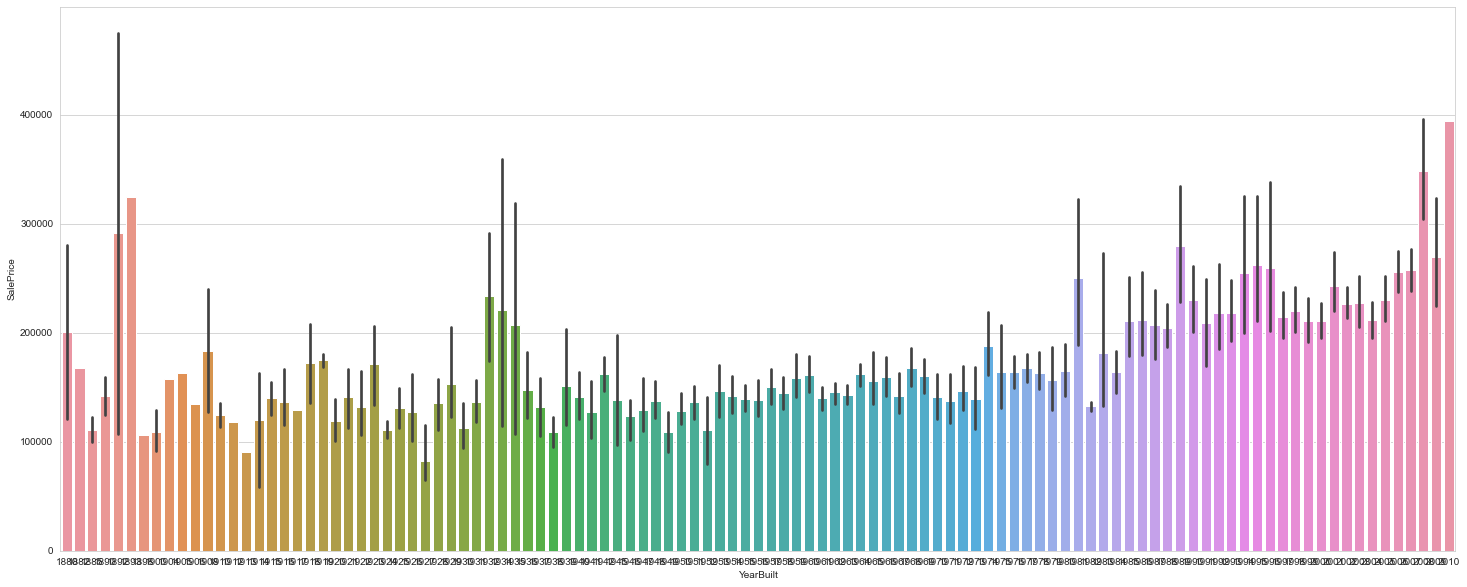

In [191]:
plt.figure(figsize=(25,10))
sns.barplot(x=df3['YearBuilt'], y=df3['SalePrice'])
plt.show()

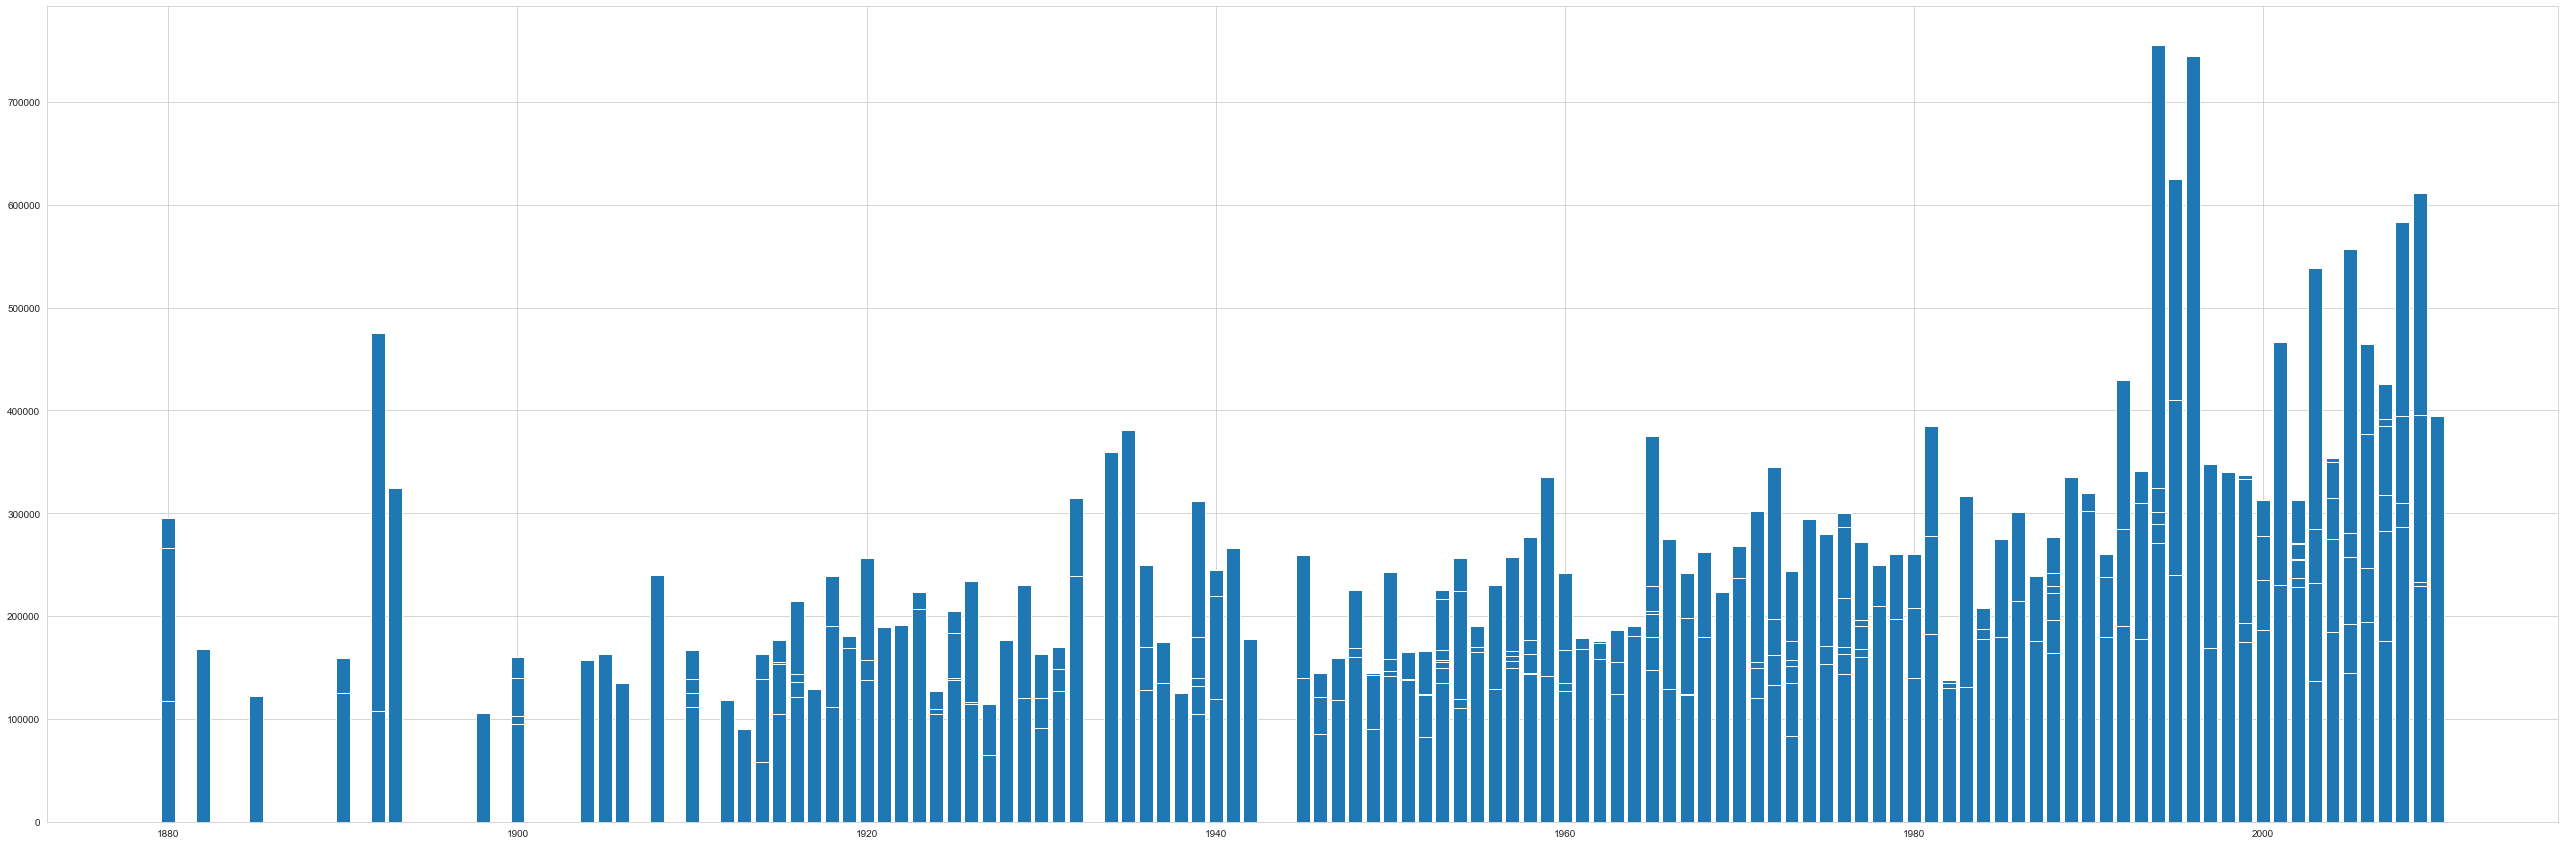

In [192]:
plt.figure(figsize=(45,15))
plt.bar(df3['YearBuilt'],df3['SalePrice'])
plt.show()

### REMOVING OUTLIERS

In [193]:
def outliers(x):
    print('Showing Outlier = '+x)
    Q1 = df3[x].quantile(.25)
    print('Q1 :', Q1)
    Q3 = df3[x].quantile(.75)
    print('Q3:',Q3)
    IQR = Q3-Q1
    print('IQR Range:',IQR)
    
    outmin = Q1- 1.5*IQR
    print('Outleir minimum',outmin)
    
    outmax= Q3 +1.5*IQR
    print('Outlier Max:',outmax)
    

In [194]:
outliers('LotFrontage')

Showing Outlier = LotFrontage
Q1 : 60.0
Q3: 79.0
IQR Range: 19.0
Outleir minimum 31.5
Outlier Max: 107.5


In [195]:
df3.shape

(1378, 25)

In [196]:
df4= df3[ (df3['LotFrontage']>33) & (df3['LotFrontage']<105)]

In [197]:
outliers('LotArea')

Showing Outlier = LotArea
Q1 : 7740.5
Q3: 11712.75
IQR Range: 3972.25
Outleir minimum 1782.125
Outlier Max: 17671.125


In [198]:
df5 = df4[(df4['LotArea']>1588.125) & (df4['LotArea']<17679.125) ]

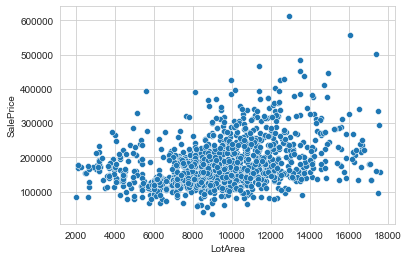

In [199]:
sns.scatterplot(x = df5['LotArea'],y=df5['SalePrice'])
plt.show()

In [200]:
outliers('1stFlrSF')

Showing Outlier = 1stFlrSF
Q1 : 894.0
Q3: 1414.0
IQR Range: 520.0
Outleir minimum 114.0
Outlier Max: 2194.0


In [201]:
df6 = df5[ (df5['1stFlrSF']>182.5) & (df5['1stFlrSF']<2074.5) ]

In [202]:
outliers('GrLivArea')

Showing Outlier = GrLivArea
Q1 : 1154.0
Q3: 1790.0
IQR Range: 636.0
Outleir minimum 200.0
Outlier Max: 2744.0


In [203]:
df7 = df6[ (df6['GrLivArea']>159.0) & (df6['GrLivArea']<2751.0)]
df7.shape

(1180, 25)

In [204]:
df7.describe()

,LotFrontage,LotArea,OverallQual,YearBuilt,1stFlrSF,GrLivArea,GarageYrBlt,SalePrice
count,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000
mean,68.695713,9372.112712,6.095763,1972.186441,1138.923729,1471.509322,1977.972034,176769.291525
std,13.542669,2838.266456,1.280830,29.642956,314.460567,431.071652,25.054615,63750.557607
min,34.000000,1974.000000,2.000000,1880.000000,438.000000,438.000000,1900.000000,35311.000000
25%,60.000000,7684.000000,5.000000,1954.000000,894.000000,1129.500000,1960.000000,132500.000000
50%,70.049958,9294.000000,6.000000,1974.500000,1086.000000,1448.500000,1979.000000,163500.000000
75%,76.000000,11097.000000,7.000000,2001.000000,1340.000000,1728.000000,2002.000000,207700.000000
max,104.000000,17600.000000,10.000000,2010.000000,2073.000000,2730.000000,2010.000000,451950.000000


In [205]:
df7['LotFrontage'] = df7['LotFrontage'].astype(int) 
df7.head()

C:\Users\mohit\AppData\Local\Temp/ipykernel_12848/1901018644.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df7['LotFrontage'] = df7['LotFrontage'].astype(int)


,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,BldgType,HouseStyle,OverallQual,YearBuilt,...,BsmtExposure,BsmtFinType1,HeatingQC,1stFlrSF,GrLivArea,KitchenQual,GarageType,GarageYrBlt,GarageFinish,SalePrice
0,RL,65,8450,Reg,Lvl,Inside,1Fam,2Story,7,2003,...,No,GLQ,Ex,856,1710,Gd,Attchd,2003.0,RFn,208500
1,RL,80,9600,Reg,Lvl,FR2,1Fam,1Story,6,1976,...,Gd,ALQ,Ex,1262,1262,TA,Attchd,1976.0,RFn,181500
2,RL,68,11250,IR1,Lvl,Inside,1Fam,2Story,7,2001,...,Mn,GLQ,Ex,920,1786,Gd,Attchd,2001.0,RFn,223500
3,RL,60,9550,IR1,Lvl,Corner,1Fam,2Story,7,1915,...,No,ALQ,Gd,961,1717,Gd,Detchd,1998.0,Unf,140000
4,RL,84,14260,IR1,Lvl,FR2,1Fam,2Story,8,2000,...,Av,GLQ,Ex,1145,2198,Gd,Attchd,2000.0,RFn,250000


### REMOVING THOSE ATTRIBUTES WHICH HAS LESS OCCURENCE 

In [206]:
def count(x):
    return df7[x].value_counts()

In [207]:
count('LotShape')

Reg    754
IR1    401
IR2     22
IR3      3
Name: LotShape, dtype: int64

In [208]:
count('LotConfig')

Inside     869
Corner     203
CulDSac     69
FR2         36
FR3          3
Name: LotConfig, dtype: int64

In [209]:
count('ExterQual')

TA    732
Gd    409
Ex     34
Fa      5
Name: ExterQual, dtype: int64

In [210]:
count('BsmtCond')

TA    1096
Gd      49
Fa      34
Po       1
Name: BsmtCond, dtype: int64

In [211]:
count('HeatingQC')

Ex    607
TA    339
Gd    198
Fa     35
Po      1
Name: HeatingQC, dtype: int64

In [212]:
count('Foundation')

PConc     538
CBlock    498
BrkTil    117
Slab       19
Stone       6
Wood        2
Name: Foundation, dtype: int64

In [213]:
print(df7[df7['LotShape']=='IR3'].index)
print(df7[df7['LotConfig']=='FR3'].index)
print(df7[df7['ExterQual']=='Fa'].index)
print(df7[df7['Foundation']=='Wood'].index)
print(df7[df7['BsmtCond']=='Po'].index)
print(df7[df7['HeatingQC']=='Po'].index)
#print(df7[df7['HeatingQC']=='Po'].index)

Int64Index([301, 1006, 1348], dtype='int64')
Int64Index([333, 531, 1265], dtype='int64')
Int64Index([341, 812, 821, 1266, 1370], dtype='int64')
Int64Index([5, 1180], dtype='int64')
Int64Index([398], dtype='int64')
Int64Index([325], dtype='int64')


In [214]:
df7.drop(index=[301,1006,1348,333,531,1265,341,812,821,1266,1370,5,1180,398,325],inplace=True)
df7.head()

C:\Users\mohit\AppData\Local\Temp/ipykernel_12848/2333374540.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df7.drop(index=[301,1006,1348,333,531,1265,341,812,821,1266,1370,5,1180,398,325],inplace=True)


,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,BldgType,HouseStyle,OverallQual,YearBuilt,...,BsmtExposure,BsmtFinType1,HeatingQC,1stFlrSF,GrLivArea,KitchenQual,GarageType,GarageYrBlt,GarageFinish,SalePrice
0,RL,65,8450,Reg,Lvl,Inside,1Fam,2Story,7,2003,...,No,GLQ,Ex,856,1710,Gd,Attchd,2003.0,RFn,208500
1,RL,80,9600,Reg,Lvl,FR2,1Fam,1Story,6,1976,...,Gd,ALQ,Ex,1262,1262,TA,Attchd,1976.0,RFn,181500
2,RL,68,11250,IR1,Lvl,Inside,1Fam,2Story,7,2001,...,Mn,GLQ,Ex,920,1786,Gd,Attchd,2001.0,RFn,223500
3,RL,60,9550,IR1,Lvl,Corner,1Fam,2Story,7,1915,...,No,ALQ,Gd,961,1717,Gd,Detchd,1998.0,Unf,140000
4,RL,84,14260,IR1,Lvl,FR2,1Fam,2Story,8,2000,...,Av,GLQ,Ex,1145,2198,Gd,Attchd,2000.0,RFn,250000


C:\Users\mohit\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


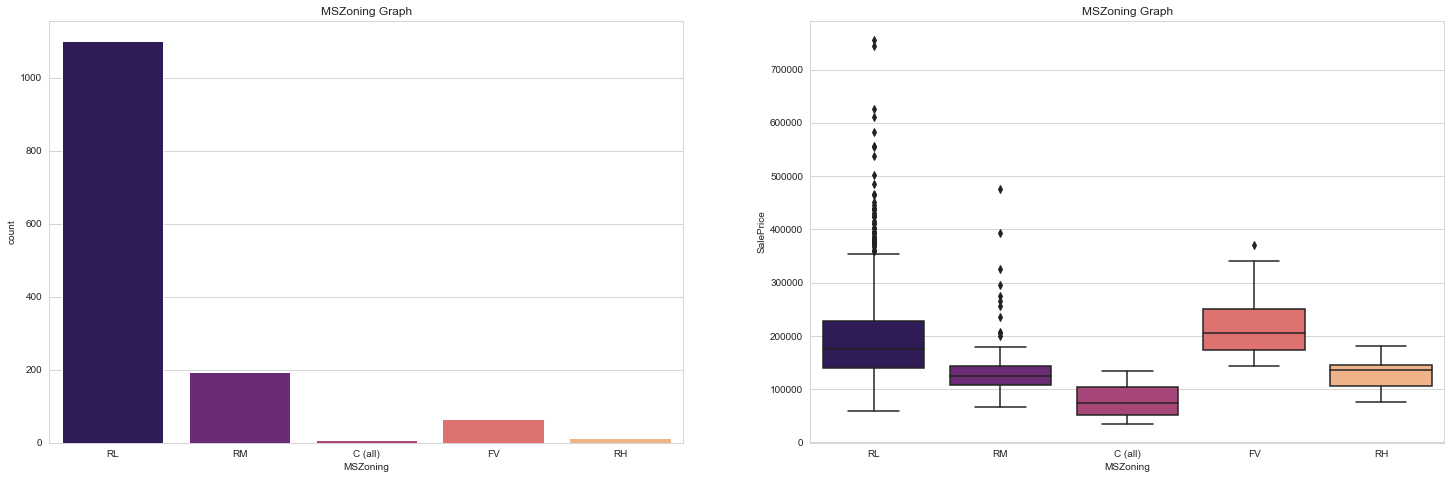

In [215]:
plt.figure(figsize=(25,45))
categorical('MSZoning',1)

In [216]:
df7.columns

Index(['MSZoning', 'LotFrontage', 'LotArea', 'LotShape', 'LandContour',
       'LotConfig', 'BldgType', 'HouseStyle', 'OverallQual', 'YearBuilt',
       'Exterior2nd', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'HeatingQC', '1stFlrSF', 'GrLivArea',
       'KitchenQual', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'SalePrice'],
      dtype='object')

In [217]:
df7.drop(columns=['OverallQual', 'Exterior2nd'],axis=1,inplace=True)
df7.head()

C:\Users\mohit\AppData\Local\Temp/ipykernel_12848/4014701847.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df7.drop(columns=['OverallQual', 'Exterior2nd'],axis=1,inplace=True)


,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,BldgType,HouseStyle,YearBuilt,ExterQual,...,BsmtExposure,BsmtFinType1,HeatingQC,1stFlrSF,GrLivArea,KitchenQual,GarageType,GarageYrBlt,GarageFinish,SalePrice
0,RL,65,8450,Reg,Lvl,Inside,1Fam,2Story,2003,Gd,...,No,GLQ,Ex,856,1710,Gd,Attchd,2003.0,RFn,208500
1,RL,80,9600,Reg,Lvl,FR2,1Fam,1Story,1976,TA,...,Gd,ALQ,Ex,1262,1262,TA,Attchd,1976.0,RFn,181500
2,RL,68,11250,IR1,Lvl,Inside,1Fam,2Story,2001,Gd,...,Mn,GLQ,Ex,920,1786,Gd,Attchd,2001.0,RFn,223500
3,RL,60,9550,IR1,Lvl,Corner,1Fam,2Story,1915,TA,...,No,ALQ,Gd,961,1717,Gd,Detchd,1998.0,Unf,140000
4,RL,84,14260,IR1,Lvl,FR2,1Fam,2Story,2000,Gd,...,Av,GLQ,Ex,1145,2198,Gd,Attchd,2000.0,RFn,250000


# REMOVING OUTLIER FROM TARGET COLUMN

In [218]:
df7.describe()

,LotFrontage,LotArea,YearBuilt,1stFlrSF,GrLivArea,GarageYrBlt,SalePrice
count,1165.000000,1165.000000,1165.000000,1165.000000,1165.000000,1165.000000,1165.000000
mean,68.745923,9372.140773,1972.327897,1140.041202,1471.902146,1978.086695,177183.151073
std,13.543388,2823.388151,29.571289,314.711702,430.087429,25.003818,63631.136630
min,34.000000,1974.000000,1880.000000,438.000000,438.000000,1900.000000,35311.000000
25%,60.000000,7700.000000,1954.000000,894.000000,1131.000000,1960.000000,133000.000000
50%,70.000000,9300.000000,1975.000000,1086.000000,1456.000000,1979.000000,163990.000000
75%,77.000000,11075.000000,2001.000000,1340.000000,1728.000000,2002.000000,208300.000000
max,104.000000,17600.000000,2010.000000,2073.000000,2730.000000,2010.000000,451950.000000


<AxesSubplot:ylabel='SalePrice'>

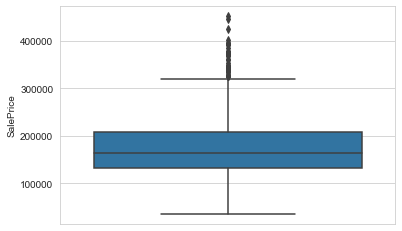

In [219]:
sns.boxplot(y = df7['SalePrice'])

In [220]:
df7.corr()

,LotFrontage,LotArea,YearBuilt,1stFlrSF,GrLivArea,GarageYrBlt,SalePrice
LotFrontage,1.000000,0.487654,0.179329,0.277262,0.297352,0.109167,0.339477
LotArea,0.487654,1.000000,0.061887,0.294083,0.330247,0.030015,0.322207
YearBuilt,0.179329,0.061887,1.000000,0.314311,0.229519,0.828563,0.611550
1stFlrSF,0.277262,0.294083,0.314311,1.000000,0.398733,0.275900,0.550135
GrLivArea,0.297352,0.330247,0.229519,0.398733,1.000000,0.250698,0.680139
GarageYrBlt,0.109167,0.030015,0.828563,0.275900,0.250698,1.000000,0.563636
SalePrice,0.339477,0.322207,0.611550,0.550135,0.680139,0.563636,1.000000


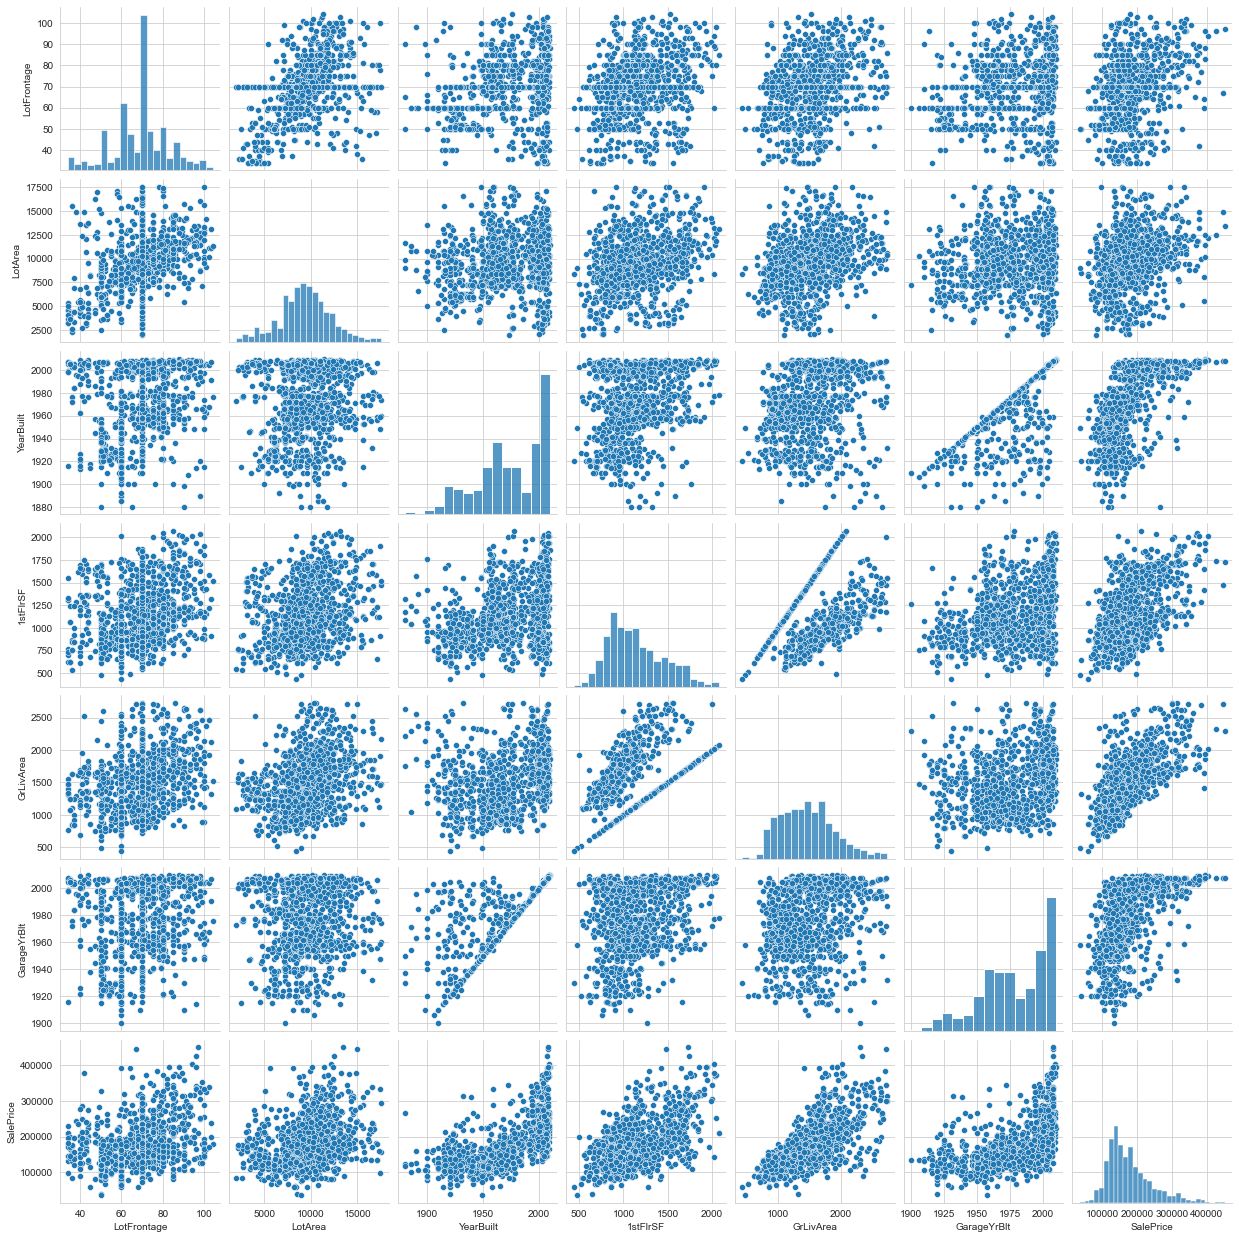

In [221]:
sns.pairplot(df7)

# REMOVING SKEWNESS

In [222]:
df7.skew().sort_values(ascending=False)

C:\Users\mohit\AppData\Local\Temp/ipykernel_12848/3064464811.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df7.skew().sort_values(ascending=False)


SalePrice      1.128333
1stFlrSF       0.577626
GrLivArea      0.489740
LotArea        0.077673
LotFrontage   -0.138176
YearBuilt     -0.590899
GarageYrBlt   -0.618118
dtype: float64

<AxesSubplot:xlabel='LotArea', ylabel='Count'>

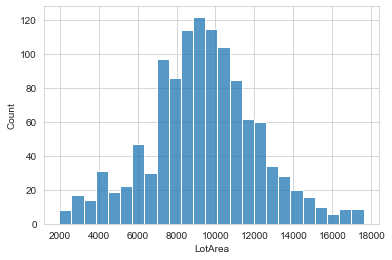

In [223]:
sns.histplot(df7['LotArea'])

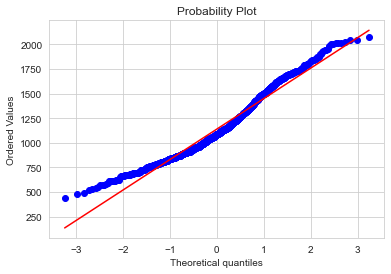

In [224]:
stats.probplot(df7['1stFlrSF'], dist="norm", plot=plt)
plt.show()

In [225]:
df7.skew().sort_values(ascending=False)

C:\Users\mohit\AppData\Local\Temp/ipykernel_12848/3064464811.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df7.skew().sort_values(ascending=False)


SalePrice      1.128333
1stFlrSF       0.577626
GrLivArea      0.489740
LotArea        0.077673
LotFrontage   -0.138176
YearBuilt     -0.590899
GarageYrBlt   -0.618118
dtype: float64

In [226]:
x = df.drop(columns=['LotConfig','BldgType','GarageYrBlt'],axis=1)

df7.shape

(1165, 23)

In [227]:
df7.columns

Index(['MSZoning', 'LotFrontage', 'LotArea', 'LotShape', 'LandContour',
       'LotConfig', 'BldgType', 'HouseStyle', 'YearBuilt', 'ExterQual',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'HeatingQC', '1stFlrSF', 'GrLivArea', 'KitchenQual', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'SalePrice'],
      dtype='object')

<AxesSubplot:xlabel='YearBuilt'>

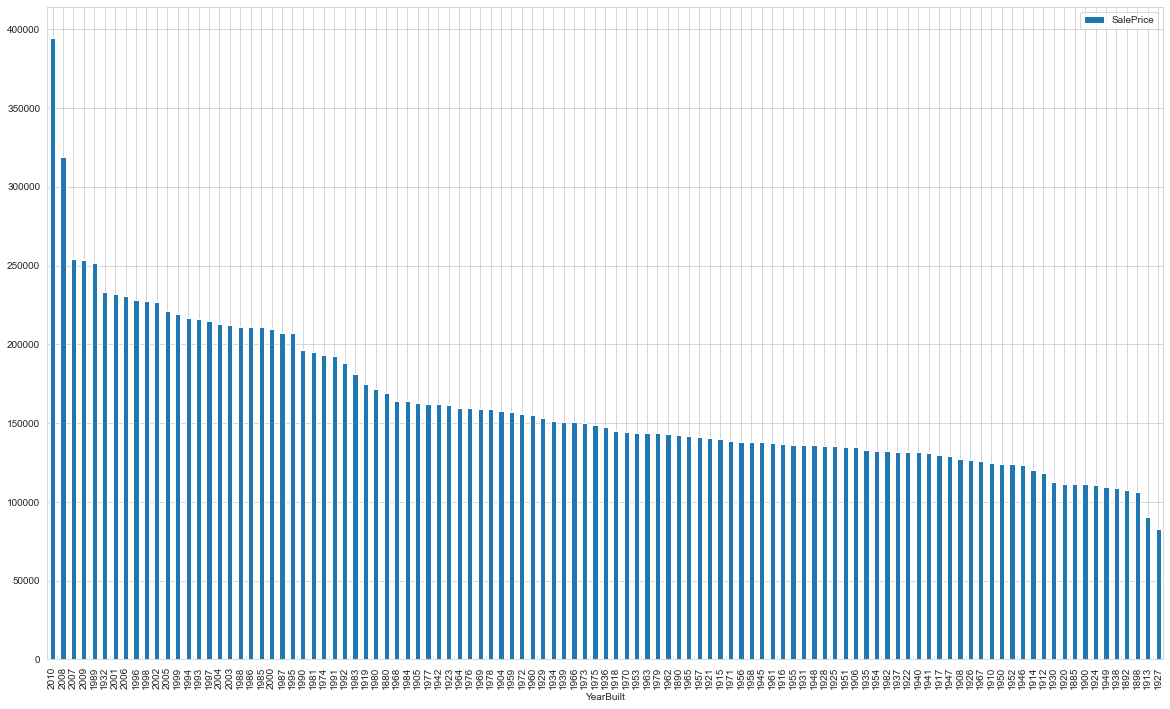

In [228]:
x =pd.DataFrame(df7.groupby(['YearBuilt'])["SalePrice"].mean().sort_values(ascending=False))
x.plot.bar(figsize=(20,12))

In [229]:
df7

,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,BldgType,HouseStyle,YearBuilt,ExterQual,...,BsmtExposure,BsmtFinType1,HeatingQC,1stFlrSF,GrLivArea,KitchenQual,GarageType,GarageYrBlt,GarageFinish,SalePrice
0,RL,65,8450,Reg,Lvl,Inside,1Fam,2Story,2003,Gd,...,No,GLQ,Ex,856,1710,Gd,Attchd,2003.0,RFn,208500
1,RL,80,9600,Reg,Lvl,FR2,1Fam,1Story,1976,TA,...,Gd,ALQ,Ex,1262,1262,TA,Attchd,1976.0,RFn,181500
2,RL,68,11250,IR1,Lvl,Inside,1Fam,2Story,2001,Gd,...,Mn,GLQ,Ex,920,1786,Gd,Attchd,2001.0,RFn,223500
3,RL,60,9550,IR1,Lvl,Corner,1Fam,2Story,1915,TA,...,No,ALQ,Gd,961,1717,Gd,Detchd,1998.0,Unf,140000
4,RL,84,14260,IR1,Lvl,FR2,1Fam,2Story,2000,Gd,...,Av,GLQ,Ex,1145,2198,Gd,Attchd,2000.0,RFn,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,62,7917,Reg,Lvl,Inside,1Fam,2Story,1999,TA,...,No,Unf,Ex,953,1647,TA,Attchd,1999.0,RFn,175000
1456,RL,85,13175,Reg,Lvl,Inside,1Fam,1Story,1978,TA,...,No,ALQ,TA,2073,2073,TA,Attchd,1978.0,Unf,210000
1457,RL,66,9042,Reg,Lvl,Inside,1Fam,2Story,1941,Ex,...,No,GLQ,Ex,1188,2340,Gd,Attchd,1941.0,RFn,266500
1458,RL,68,9717,Reg,Lvl,Inside,1Fam,1Story,1950,TA,...,Mn,GLQ,Gd,1078,1078,Gd,Attchd,1950.0,Unf,142125


# MODEL BUILDING 

In [230]:
df8 = df7.copy()

In [231]:
df8.columns

Index(['MSZoning', 'LotFrontage', 'LotArea', 'LotShape', 'LandContour',
       'LotConfig', 'BldgType', 'HouseStyle', 'YearBuilt', 'ExterQual',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'HeatingQC', '1stFlrSF', 'GrLivArea', 'KitchenQual', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'SalePrice'],
      dtype='object')

In [232]:
df8.drop(columns=['LotConfig','BldgType','GarageYrBlt','YearBuilt'],axis=1,inplace=True)
df8.shape

(1165, 19)

In [233]:
df7.shape

(1165, 23)

In [234]:
df9 = pd.get_dummies(df8)
df9['Price'] = df9['SalePrice']
df9.drop(columns =['SalePrice'],axis=1,inplace=True)
df9.head()

,LotFrontage,LotArea,1stFlrSF,GrLivArea,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR1,...,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,Price
0,65,8450,856,1710,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,208500
1,80,9600,1262,1262,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,181500
2,68,11250,920,1786,0,0,0,1,0,1,...,0,1,0,0,0,0,0,1,0,223500
3,60,9550,961,1717,0,0,0,1,0,1,...,0,0,0,0,0,1,0,0,1,140000
4,84,14260,1145,2198,0,0,0,1,0,1,...,0,1,0,0,0,0,0,1,0,250000


In [235]:
df9.corr()

,LotFrontage,LotArea,1stFlrSF,GrLivArea,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR1,...,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,Price
LotFrontage,1.000000,0.487654,0.277262,0.297352,-0.058885,-0.018179,-0.062420,0.280527,-0.286119,0.119274,...,0.019529,0.230346,-0.035137,0.076734,-0.006527,-0.276941,0.077085,0.143962,-0.200817,0.339477
LotArea,0.487654,1.000000,0.294083,0.330247,-0.018190,-0.152900,-0.076063,0.375893,-0.318044,0.268868,...,-0.008192,0.174875,-0.028138,0.049034,0.057094,-0.211196,0.052466,0.056479,-0.097749,0.322207
1stFlrSF,0.277262,0.294083,1.000000,0.398733,-0.076136,-0.057263,-0.036015,0.237543,-0.215318,0.116443,...,0.025555,0.357360,0.035498,-0.108729,0.014100,-0.336685,0.159148,0.167237,-0.292675,0.550135
GrLivArea,0.297352,0.330247,0.398733,1.000000,-0.030723,0.076110,-0.019220,0.071613,-0.119297,0.148216,...,0.030734,0.136921,-0.052777,0.278113,-0.026955,-0.274908,0.246696,0.116132,-0.319445,0.680139
MSZoning_C (all),-0.058885,-0.018190,-0.076136,-0.030723,1.000000,-0.015863,-0.007025,-0.148290,-0.027765,-0.051830,...,-0.004223,-0.094591,-0.007340,-0.017632,0.178716,0.085700,-0.039900,0.002164,0.032018,-0.108355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GarageType_Detchd,-0.276941,-0.211196,-0.336685,-0.274908,0.085700,-0.033764,0.073989,-0.313504,0.348147,-0.187734,...,-0.037681,-0.843969,-0.065492,-0.157321,-0.042147,1.000000,-0.307028,-0.387041,0.625044,-0.454844
GarageFinish_Fin,0.077085,0.052466,0.159148,0.246696,-0.039900,0.060641,-0.012287,0.068089,-0.105534,0.138237,...,-0.032550,0.182404,0.003562,0.240555,-0.036408,-0.307028,1.000000,-0.379814,-0.497054,0.407362
GarageFinish_RFn,0.143962,0.056479,0.167237,0.116132,0.002164,0.067930,-0.066870,0.149488,-0.198525,0.100601,...,-0.008727,0.375782,0.003068,-0.008559,-0.044967,-0.387041,-0.379814,1.000000,-0.613907,0.211377
GarageFinish_Unf,-0.200817,-0.097749,-0.292675,-0.319445,0.032018,-0.115466,0.073209,-0.198324,0.276273,-0.212326,...,0.035961,-0.508137,-0.005917,-0.197243,0.073247,0.625044,-0.497054,-0.613907,1.000000,-0.545886


### FEATURE SCALING

In [236]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
np.random.seed(0)
df_train, df_test = train_test_split(df9,test_size=0.3,random_state=122)
data_num = df9[['LotFrontage','LotArea','1stFlrSF','GrLivArea','Price']].columns
df_train[data_num] = scaler.fit_transform(df_train[data_num])
df_train.head()

,LotFrontage,LotArea,1stFlrSF,GrLivArea,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR1,...,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,Price
1117,-0.860430,0.139005,-0.797317,-1.305742,0,0,0,1,0,1,...,0,1,0,0,0,0,0,1,0,-0.734021
872,0.376600,-0.169063,-0.746829,-1.268992,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,-0.951319
223,0.085534,0.399026,-0.891982,-1.374648,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,-1.246225
1431,0.085534,-1.569503,-0.595365,-1.158743,0,0,0,1,0,1,...,0,1,0,0,0,0,0,1,0,-0.520602
400,-2.242993,1.975758,0.445952,-0.400782,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,1.058694


In [237]:
df_train[data_num].describe()

,LotFrontage,LotArea,1stFlrSF,GrLivArea,Price
count,8.150000e+02,8.150000e+02,8.150000e+02,8.150000e+02,8.150000e+02
mean,3.487326e-16,2.615495e-16,2.037906e-16,-4.795074e-17,-1.721867e-16
std,1.000614e+00,1.000614e+00,1.000614e+00,1.000614e+00,1.000614e+00
min,-2.534059e+00,-2.613120e+00,-2.236228e+00,-2.353106e+00,-2.203720e+00
25%,-6.421308e-01,-6.016661e-01,-7.783839e-01,-7.774661e-01,-6.952173e-01
50%,8.553410e-02,-4.258548e-02,-1.630603e-01,-7.462937e-02,-2.140559e-01
75%,6.676660e-01,5.995182e-01,6.479047e-01,6.040904e-01,4.750913e-01
max,2.559595e+00,2.907382e+00,2.837826e+00,2.911278e+00,4.263073e+00


In [238]:
np.round(df_train.describe(),1)

,LotFrontage,LotArea,1stFlrSF,GrLivArea,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR1,...,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,Price
count,815.0,815.0,815.0,815.0,815.0,815.0,815.0,815.0,815.0,815.0,...,815.0,815.0,815.0,815.0,815.0,815.0,815.0,815.0,815.0,815.0
mean,0.0,0.0,0.0,-0.0,0.0,0.1,0.0,0.8,0.1,0.3,...,0.0,0.6,0.0,0.1,0.0,0.3,0.2,0.3,0.4,-0.0
std,1.0,1.0,1.0,1.0,0.1,0.2,0.1,0.4,0.3,0.5,...,0.1,0.5,0.1,0.2,0.1,0.5,0.4,0.5,0.5,1.0
min,-2.5,-2.6,-2.2,-2.4,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.2
25%,-0.6,-0.6,-0.8,-0.8,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.7
50%,0.1,-0.0,-0.2,-0.1,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.2
75%,0.7,0.6,0.6,0.6,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.5
max,2.6,2.9,2.8,2.9,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.3


In [239]:
df_train.describe()

,LotFrontage,LotArea,1stFlrSF,GrLivArea,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR1,...,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,Price
count,8.150000e+02,8.150000e+02,8.150000e+02,8.150000e+02,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,...,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,8.150000e+02
mean,3.487326e-16,2.615495e-16,2.037906e-16,-4.795074e-17,0.004908,0.050307,0.008589,0.813497,0.122699,0.346012,...,0.003681,0.646626,0.009816,0.051534,0.004908,0.283436,0.236810,0.322699,0.440491,-1.721867e-16
std,1.000614e+00,1.000614e+00,1.000614e+00,1.000614e+00,0.069928,0.218711,0.092334,0.389751,0.328293,0.475989,...,0.060597,0.478311,0.098649,0.221219,0.069928,0.450943,0.425386,0.467796,0.496751,1.000614e+00
min,-2.534059e+00,-2.613120e+00,-2.236228e+00,-2.353106e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.203720e+00
25%,-6.421308e-01,-6.016661e-01,-7.783839e-01,-7.774661e-01,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.952173e-01
50%,8.553410e-02,-4.258548e-02,-1.630603e-01,-7.462937e-02,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.140559e-01
75%,6.676660e-01,5.995182e-01,6.479047e-01,6.040904e-01,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,4.750913e-01
max,2.559595e+00,2.907382e+00,2.837826e+00,2.911278e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.263073e+00


plt.figure(figsize=(75,95))
sns.heatmap(df_train.corr(),annot=True,cmap="YlGnBu")

In [240]:
#Removing columns due to negative correlation

df_train.drop(columns = ['MSZoning_C (all)','MSZoning_RH','MSZoning_RM','LotShape_Reg','HouseStyle_1.5Fin',
                         'HouseStyle_1.5Unf','ExterQual_TA','Foundation_BrkTil','Foundation_CBlock', 'BsmtExposure_No',
                         'BsmtFinType1_BLQ','BsmtFinType1_Rec','HeatingQC_Fa','HeatingQC_TA','KitchenQual_Fa',
                         'KitchenQual_TA','GarageType_Detchd','HouseStyle_1Story',
                         'Foundation_Slab','BsmtQual_Fa','BsmtQual_TA','BsmtCond_Fa','BsmtQual_TA','BsmtCond_Fa'],axis=1,
             inplace=True)
df_train.head()

,LotFrontage,LotArea,1stFlrSF,GrLivArea,MSZoning_FV,MSZoning_RL,LotShape_IR1,LotShape_IR2,LandContour_Bnk,LandContour_HLS,...,KitchenQual_Gd,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,Price
1117,-0.860430,0.139005,-0.797317,-1.305742,0,1,1,0,0,0,...,1,0,1,0,0,0,0,1,0,-0.734021
872,0.376600,-0.169063,-0.746829,-1.268992,0,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,-0.951319
223,0.085534,0.399026,-0.891982,-1.374648,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,-1.246225
1431,0.085534,-1.569503,-0.595365,-1.158743,0,1,1,0,0,0,...,0,0,1,0,0,0,0,1,0,-0.520602
400,-2.242993,1.975758,0.445952,-0.400782,0,1,0,1,0,0,...,0,0,1,0,0,0,1,0,0,1.058694


In [241]:
df_train.corr().columns

Index(['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'MSZoning_FV',
       'MSZoning_RL', 'LotShape_IR1', 'LotShape_IR2', 'LandContour_Bnk',
       'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl',
       'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf', 'HouseStyle_2Story',
       'HouseStyle_SFoyer', 'HouseStyle_SLvl', 'ExterQual_Ex', 'ExterQual_Gd',
       'Foundation_PConc', 'Foundation_Stone', 'BsmtQual_Ex', 'BsmtQual_Gd',
       'BsmtCond_Gd', 'BsmtCond_TA', 'BsmtExposure_Av', 'BsmtExposure_Gd',
       'BsmtExposure_Mn', 'BsmtFinType1_ALQ', 'BsmtFinType1_GLQ',
       'BsmtFinType1_LwQ', 'BsmtFinType1_Unf', 'HeatingQC_Ex', 'HeatingQC_Gd',
       'KitchenQual_Ex', 'KitchenQual_Gd', 'GarageType_2Types',
       'GarageType_Attchd', 'GarageType_Basment', 'GarageType_BuiltIn',
       'GarageType_CarPort', 'GarageFinish_Fin', 'GarageFinish_RFn',
       'GarageFinish_Unf', 'Price'],
      dtype='object')

In [242]:
#Dividing data into X and y variables

y_train = df_train.pop('Price')
X_train = df_train

In [243]:
y_train.shape, X_train.shape

((815,), (815, 44))

### MODEL BUILDING

In [244]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [245]:
lr = LinearRegression()
lr.fit(X_train,y_train)
rfe = RFE(lr)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression())

### Creating Support-wise ranking of columns

In [246]:
print(len(list(zip(X_train.columns,rfe.support_, rfe.ranking_))))

list(zip(X_train.columns,rfe.support_, rfe.ranking_))

44


[('LotFrontage', False, 12),
 ('LotArea', False, 4),
 ('1stFlrSF', False, 3),
 ('GrLivArea', True, 1),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RL', True, 1),
 ('LotShape_IR1', False, 15),
 ('LotShape_IR2', False, 14),
 ('LandContour_Bnk', False, 5),
 ('LandContour_HLS', True, 1),
 ('LandContour_Low', False, 17),
 ('LandContour_Lvl', False, 18),
 ('HouseStyle_2.5Fin', True, 1),
 ('HouseStyle_2.5Unf', True, 1),
 ('HouseStyle_2Story', False, 23),
 ('HouseStyle_SFoyer', False, 16),
 ('HouseStyle_SLvl', False, 8),
 ('ExterQual_Ex', True, 1),
 ('ExterQual_Gd', True, 1),
 ('Foundation_PConc', False, 10),
 ('Foundation_Stone', False, 19),
 ('BsmtQual_Ex', True, 1),
 ('BsmtQual_Gd', True, 1),
 ('BsmtCond_Gd', True, 1),
 ('BsmtCond_TA', True, 1),
 ('BsmtExposure_Av', False, 9),
 ('BsmtExposure_Gd', True, 1),
 ('BsmtExposure_Mn', False, 7),
 ('BsmtFinType1_ALQ', False, 11),
 ('BsmtFinType1_GLQ', True, 1),
 ('BsmtFinType1_LwQ', True, 1),
 ('BsmtFinType1_Unf', True, 1),
 ('HeatingQC_Ex', False, 2),


In [247]:
len(X_train.columns[rfe.support_])

22

In [248]:
X_train.columns[rfe.support_]

Index(['GrLivArea', 'MSZoning_FV', 'MSZoning_RL', 'LandContour_HLS',
       'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf', 'ExterQual_Ex',
       'ExterQual_Gd', 'BsmtQual_Ex', 'BsmtQual_Gd', 'BsmtCond_Gd',
       'BsmtCond_TA', 'BsmtExposure_Gd', 'BsmtFinType1_GLQ',
       'BsmtFinType1_LwQ', 'BsmtFinType1_Unf', 'KitchenQual_Ex',
       'KitchenQual_Gd', 'GarageType_2Types', 'GarageType_Basment',
       'GarageType_CarPort', 'GarageFinish_Unf'],
      dtype='object')

In [249]:
len(X_train.columns[rfe.support_])

22

In [250]:
print('lenth:',len)

lenth: <built-in function len>


In [251]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,GrLivArea,MSZoning_FV,MSZoning_RL,LandContour_HLS,HouseStyle_2.5Fin,HouseStyle_2.5Unf,ExterQual_Ex,ExterQual_Gd,BsmtQual_Ex,BsmtQual_Gd,...,BsmtExposure_Gd,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Unf,KitchenQual_Ex,KitchenQual_Gd,GarageType_2Types,GarageType_Basment,GarageType_CarPort,GarageFinish_Unf
1117,-1.305742,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
872,-1.268992,0,1,0,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,1
223,-1.374648,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1431,-1.158743,0,1,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
400,-0.400782,0,1,0,0,0,0,1,0,1,...,0,1,0,0,1,0,0,0,0,0


In [252]:
X_train_rfe.columns

Index(['GrLivArea', 'MSZoning_FV', 'MSZoning_RL', 'LandContour_HLS',
       'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf', 'ExterQual_Ex',
       'ExterQual_Gd', 'BsmtQual_Ex', 'BsmtQual_Gd', 'BsmtCond_Gd',
       'BsmtCond_TA', 'BsmtExposure_Gd', 'BsmtFinType1_GLQ',
       'BsmtFinType1_LwQ', 'BsmtFinType1_Unf', 'KitchenQual_Ex',
       'KitchenQual_Gd', 'GarageType_2Types', 'GarageType_Basment',
       'GarageType_CarPort', 'GarageFinish_Unf'],
      dtype='object')

In [253]:
X_train_rfe.shape,y_train.shape

((815, 22), (815,))

In [254]:
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

### FITING THE MODEL

In [255]:
X_train_new = build_model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     196.9
Date:                Sat, 24 Dec 2022   Prob (F-statistic):          4.63e-303
Time:                        09:19:03   Log-Likelihood:                -395.64
No. Observations:                 815   AIC:                             837.3
Df Residuals:                     792   BIC:                             945.5
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.7644      0

### MODEL 2

In [256]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     196.9
Date:                Sat, 24 Dec 2022   Prob (F-statistic):          4.63e-303
Time:                        09:19:03   Log-Likelihood:                -395.64
No. Observations:                 815   AIC:                             837.3
Df Residuals:                     792   BIC:                             945.5
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.7644      0

In [257]:
X_train_new = X_train_rfe.drop(["GarageType_2Types"], axis = 1)

### MODEL 3

In [258]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     205.8
Date:                Sat, 24 Dec 2022   Prob (F-statistic):          9.61e-304
Time:                        09:19:03   Log-Likelihood:                -396.78
No. Observations:                 815   AIC:                             837.6
Df Residuals:                     793   BIC:                             941.0
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.7822      0

In [259]:
checkVIF(X_train_new)

,Features,VIF
0,const,51.42
8,ExterQual_Gd,2.66
12,BsmtCond_TA,2.61
11,BsmtCond_Gd,2.61
18,KitchenQual_Gd,2.26
10,BsmtQual_Gd,2.12
9,BsmtQual_Ex,2.07
17,KitchenQual_Ex,2.03
7,ExterQual_Ex,2.02
14,BsmtFinType1_GLQ,2.00


In [260]:
#Dropping KitchenQual_Ex to see the changes in model statistics
X_train_new = X_train_new.drop(['KitchenQual_Gd'], axis = 1)

### MODEL 4

In [261]:
X_train_new = build_model(X_train_new,y_train)
checkVIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     212.3
Date:                Sat, 24 Dec 2022   Prob (F-statistic):          4.05e-302
Time:                        09:19:04   Log-Likelihood:                -403.42
No. Observations:                 815   AIC:                             848.8
Df Residuals:                     794   BIC:                             947.6
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.7663      0

,Features,VIF
0,const,51.32
12,BsmtCond_TA,2.61
11,BsmtCond_Gd,2.61
8,ExterQual_Gd,2.11
10,BsmtQual_Gd,2.10
9,BsmtQual_Ex,2.06
7,ExterQual_Ex,1.98
14,BsmtFinType1_GLQ,1.97
20,GarageFinish_Unf,1.68
17,KitchenQual_Ex,1.66


### RESULT AND ANALYSIS

In [262]:
lm = sm.OLS(y_train,X_train_new).fit()
y_train_price = lm.predict(X_train_new)

C:\Users\mohit\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

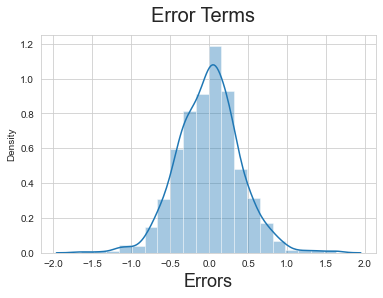

In [263]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   

### PERFORANCE  EVALUATION & ANALYSIS

In [264]:
df_test = df_test

In [265]:
#Scaling the test set
num_vars = ['LotFrontage','LotArea','1stFlrSF','GrLivArea','Price']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])


In [266]:
#Dividing into X and y
y_test = df_test.pop('Price')

X_test = df_test

In [267]:
# Now let's use our model to make predictions.
X_train_new = X_train_new.drop('const',axis=1)
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [268]:
# Making predictions
y_pred = lm.predict(X_test_new)

#### Evaluation of test via comparison of y_pred and y_test

In [269]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)*100

80.43339377535798

##### Plotting y_test and y_pred to understand the spread.

Text(0, 0.5, 'y_pred')

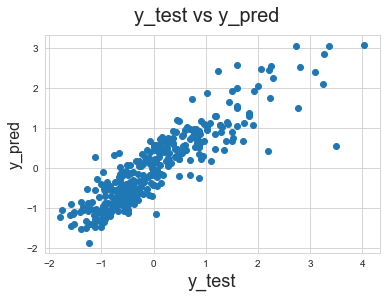

In [270]:
#EVALUATION OF THE MODEL
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)  

In [271]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     212.3
Date:                Sat, 24 Dec 2022   Prob (F-statistic):          4.05e-302
Time:                        09:19:04   Log-Likelihood:                -403.42
No. Observations:                 815   AIC:                             848.8
Df Residuals:                     794   BIC:                             947.6
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.7663      0

In [272]:
lm = sm.OLS(y_train,X_train_new).fit()
y_train_price = lm.predict(X_train_new)
y_train_price

1117   -0.736807
872    -0.852740
223    -1.059133
1431   -0.726213
400     0.932054
          ...   
1216   -0.363302
240     0.812281
1089    0.488965
1035   -1.281319
505    -0.304517
Length: 815, dtype: float64

In [273]:
from sklearn.metrics import mean_squared_error
print('test errror', mean_squared_error(y_test,y_pred, squared=True)*100)

test errror 19.56660622464202


#### Inference :

1. *R-sqaured and Adjusted R-squared (extent of fit)* - 0.842 and 0.838 - `90%` variance explained.
2. *F-stats and Prob(F-stats) (overall model fit)* - 308.0 and 1.04e-67(approx. 0.0) - Model fir is significant and explained `90%` variance is just not by chance.
3. *p-values* - p-values for all the coefficients seem to be less than the significance level of 0.05. - meaning that all the predictors are statistically significant.